**data**

https://www.kaggle.com/datasets/sampadab17/network-intrusion-detection?select=Train_data.csv

In [1]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report
import lightgbm as lgb

In [3]:
# with open("kddcup.names", 'r') as f:
#     print(f.read())

In [4]:
# cols ="""duration,
# protocol_type,
# service,
# flag,
# src_bytes,
# dst_bytes,
# land,
# wrong_fragment,
# urgent,
# hot,
# num_failed_logins,
# logged_in,
# num_compromised,
# root_shell,
# su_attempted,
# num_root,
# num_file_creations,
# num_shells,
# num_access_files,
# num_outbound_cmds,
# is_host_login,
# is_guest_login,
# count,
# srv_count,
# serror_rate,
# srv_serror_rate,
# rerror_rate,
# srv_rerror_rate,
# same_srv_rate,
# diff_srv_rate,
# srv_diff_host_rate,
# dst_host_count,
# dst_host_srv_count,
# dst_host_same_srv_rate,
# dst_host_diff_srv_rate,
# dst_host_same_src_port_rate,
# dst_host_srv_diff_host_rate,
# dst_host_serror_rate,
# dst_host_srv_serror_rate,
# dst_host_rerror_rate,
# dst_host_srv_rerror_rate"""

# columns =[]
# for c in cols.split(','):
# 	if(c.strip()):
# 	  columns.append(c.strip())


# columns.append('target')
# print(len(columns))


In [5]:
# df=pd.read_csv("/content/kddcup.data_10_percent.gz",names=columns)
# df.head()

In [6]:
df=pd.read_csv("/content/Train_data.csv")
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [8]:
#we have no null values in the dataset
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

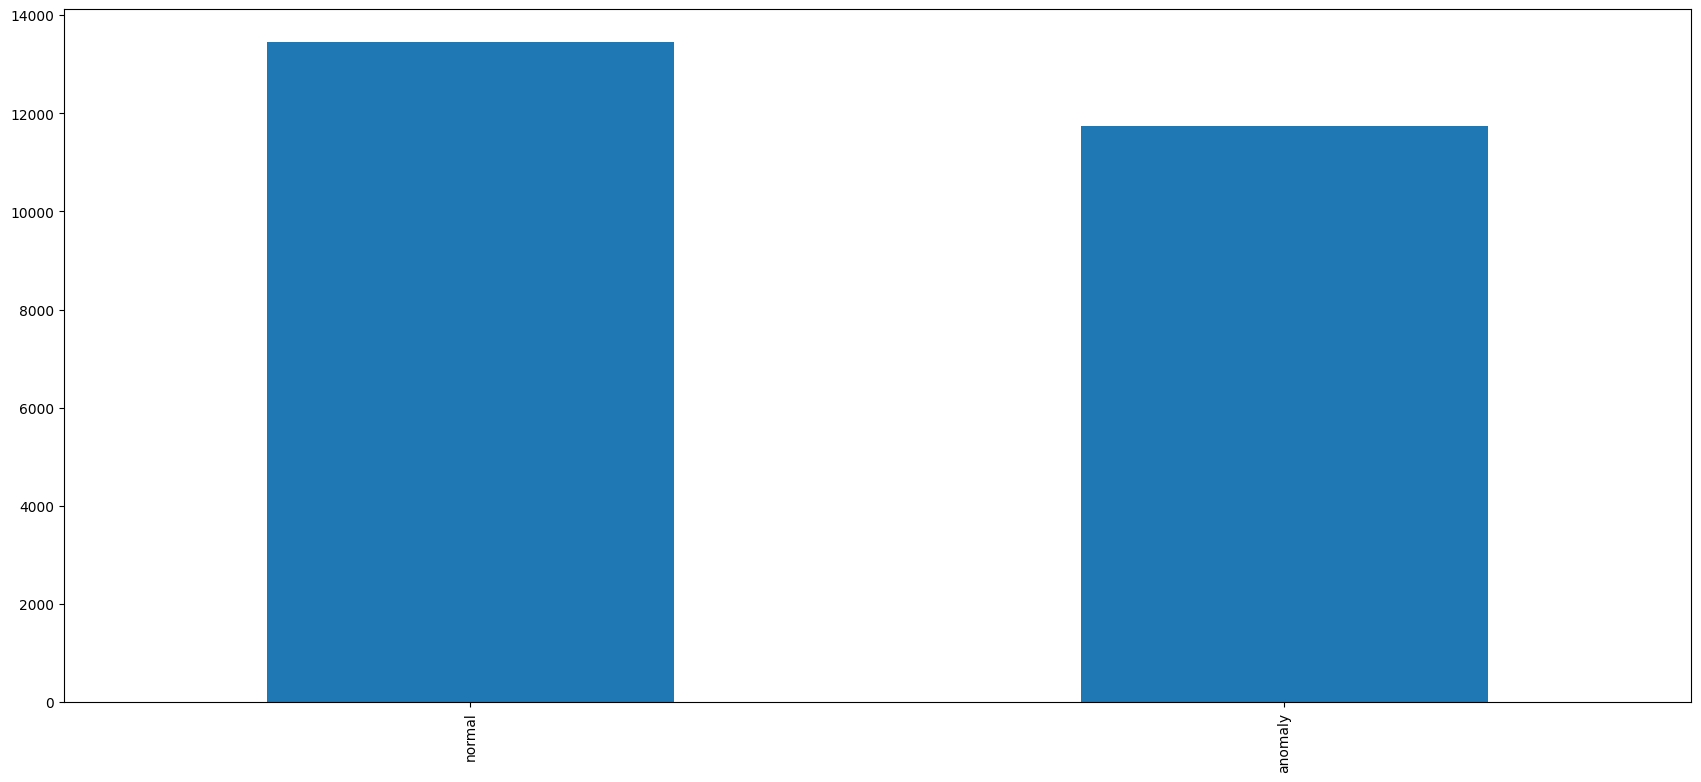

In [9]:
#the data is imbalanced a simple way to handle this problem is by simply resampling the data either by
#upsampling it or downsampling it and since the difference between the two classes isnt that large
#we will downsample it
#now since the data is balanced we can use the accuracy as a metric to evaluate our models performance
#https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/

#e8r2 el linkat ya ghabi

plt.figure(figsize=(21,9))

df["class"].value_counts().plot(kind="bar")
plt.savefig('target_class.png')

In [10]:
#before handling the imbalance problem
pd.DataFrame(df["class"].value_counts())

,class
normal,13449
anomaly,11743


In [11]:
#after handling the imbalance problem
df=pd.concat([df[df["class"]=="anomaly"],df[df["class"]=="normal"].sample(len(df[df["class"]=="anomaly"]),random_state=42)]).reset_index(drop=True)
pd.DataFrame(df["class"].value_counts())

,class
anomaly,11743
normal,11743


<ipython-input-12-b1d524e60dd1>:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], ax=ax[1], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


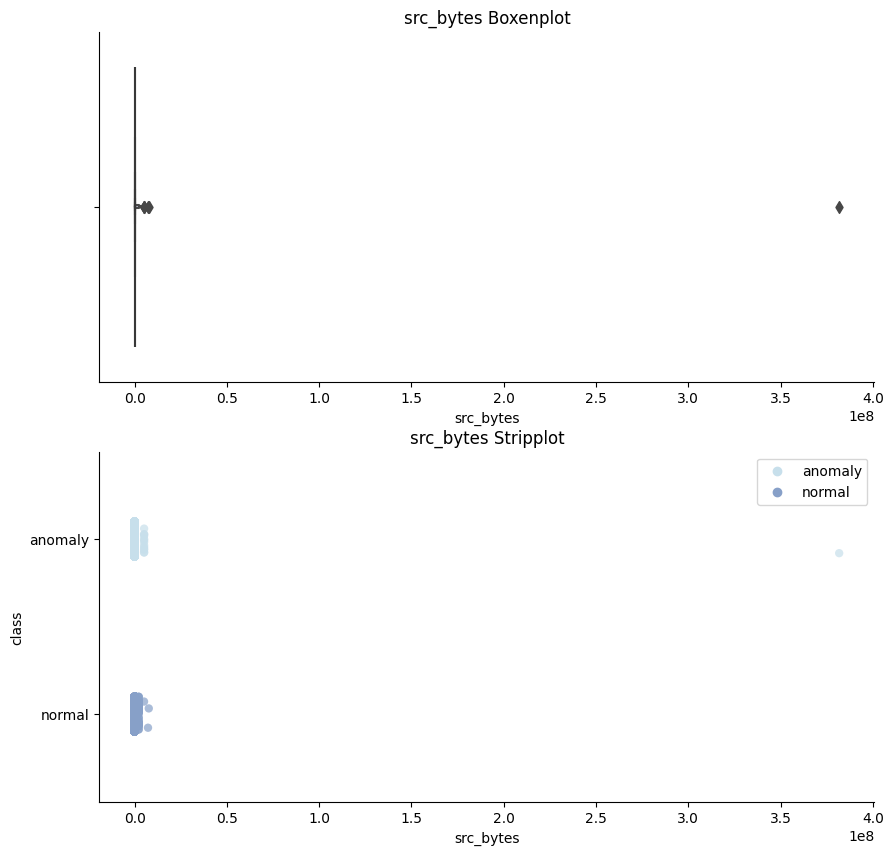

<ipython-input-12-b1d524e60dd1>:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], ax=ax[1], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


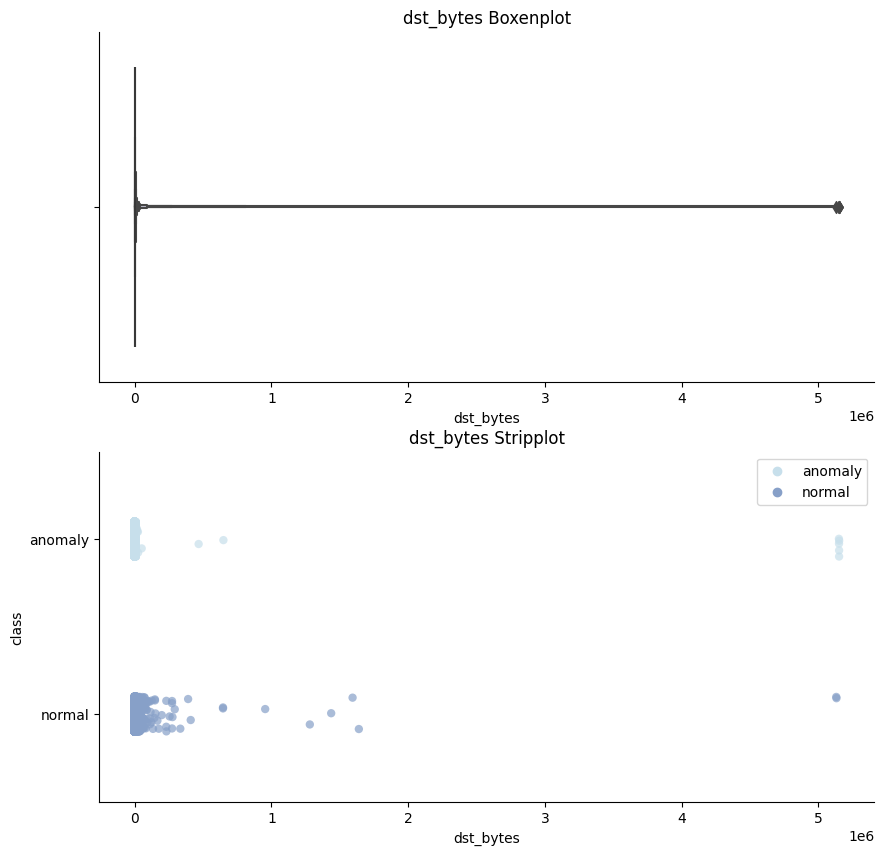

<ipython-input-12-b1d524e60dd1>:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], ax=ax[1], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


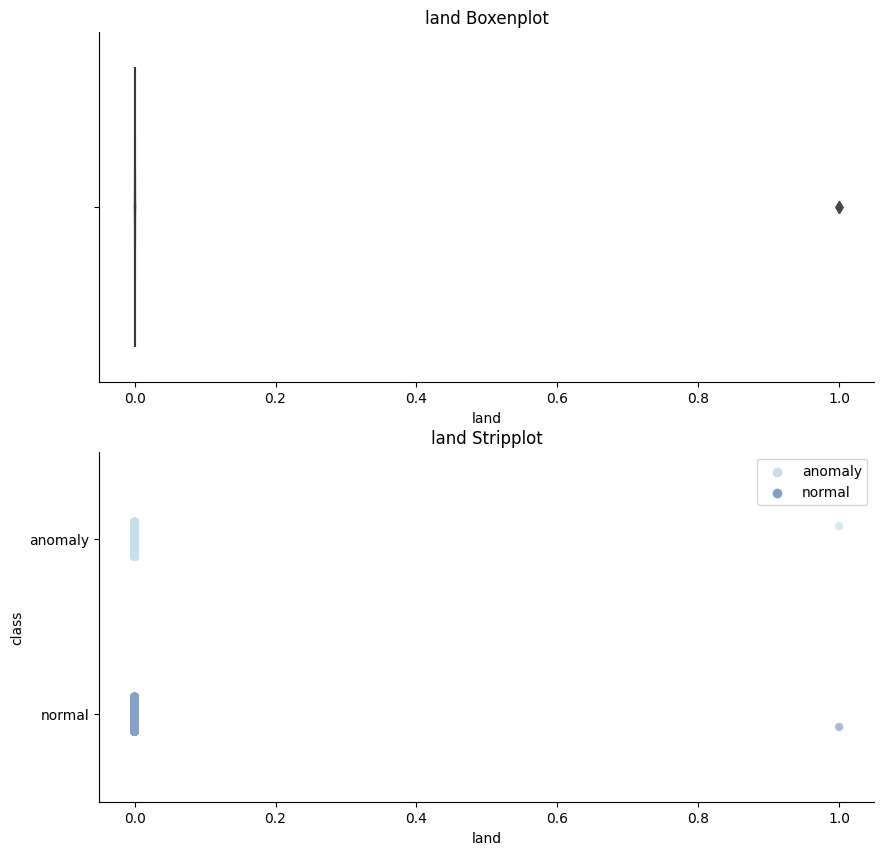

<ipython-input-12-b1d524e60dd1>:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], ax=ax[1], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


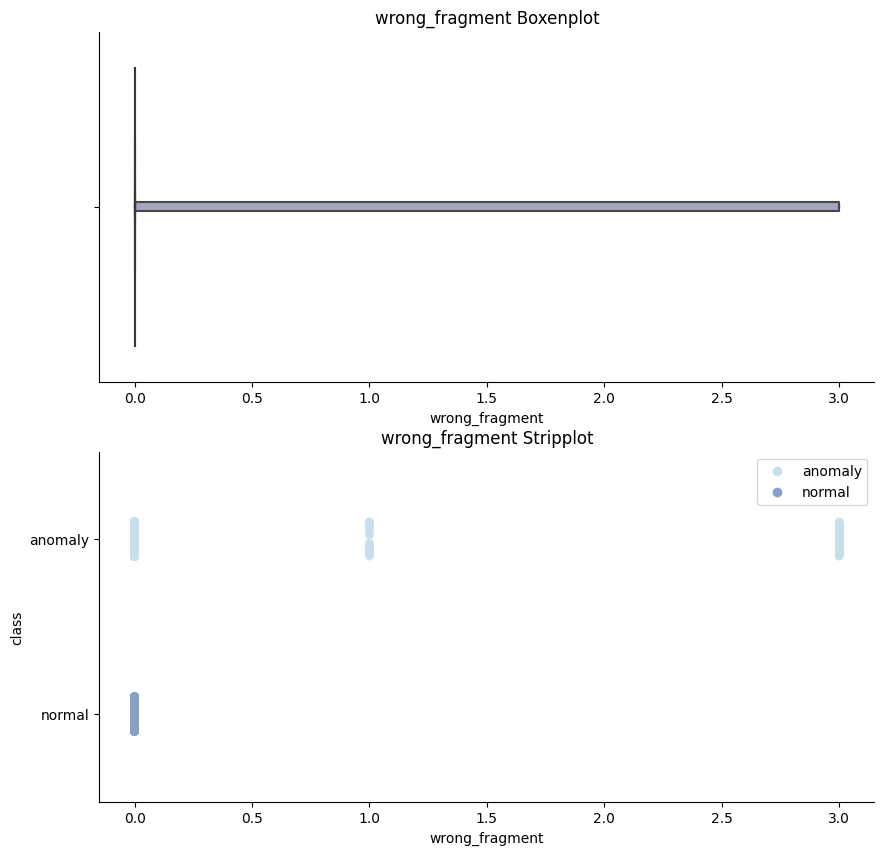

<ipython-input-12-b1d524e60dd1>:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], ax=ax[1], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


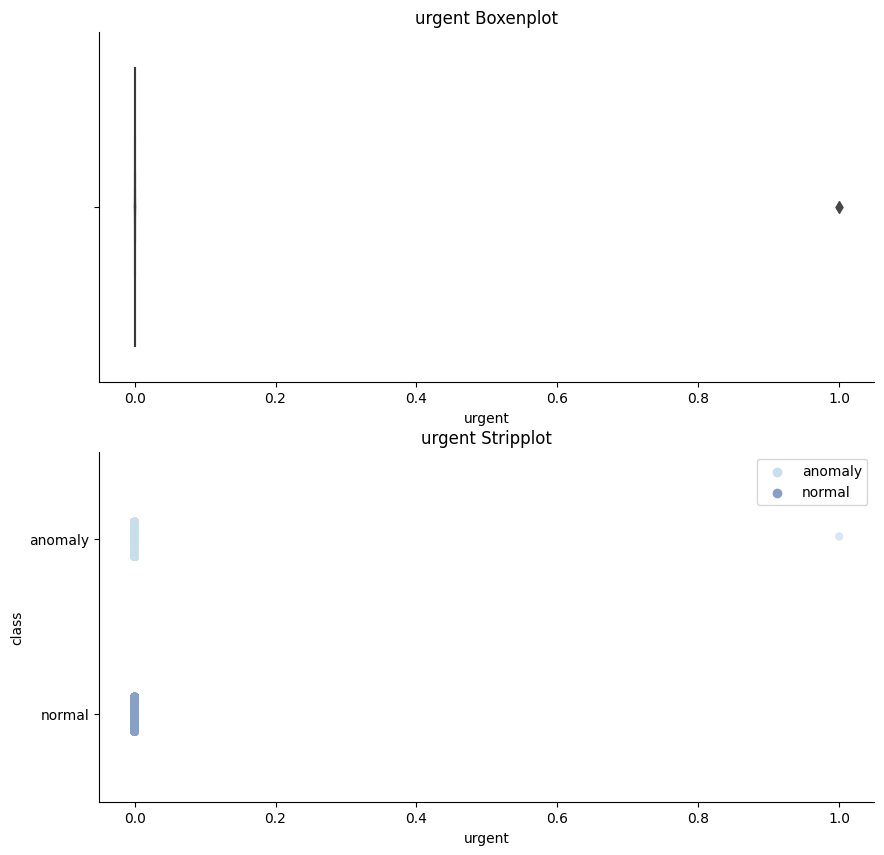

<ipython-input-12-b1d524e60dd1>:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], ax=ax[1], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


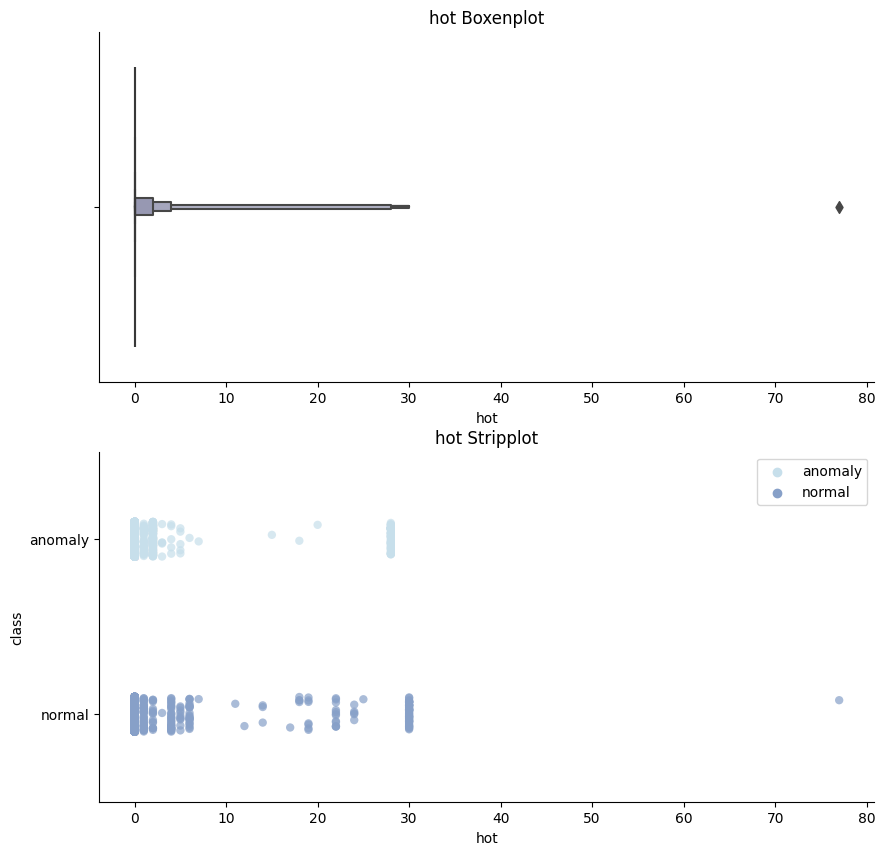

<ipython-input-12-b1d524e60dd1>:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], ax=ax[1], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


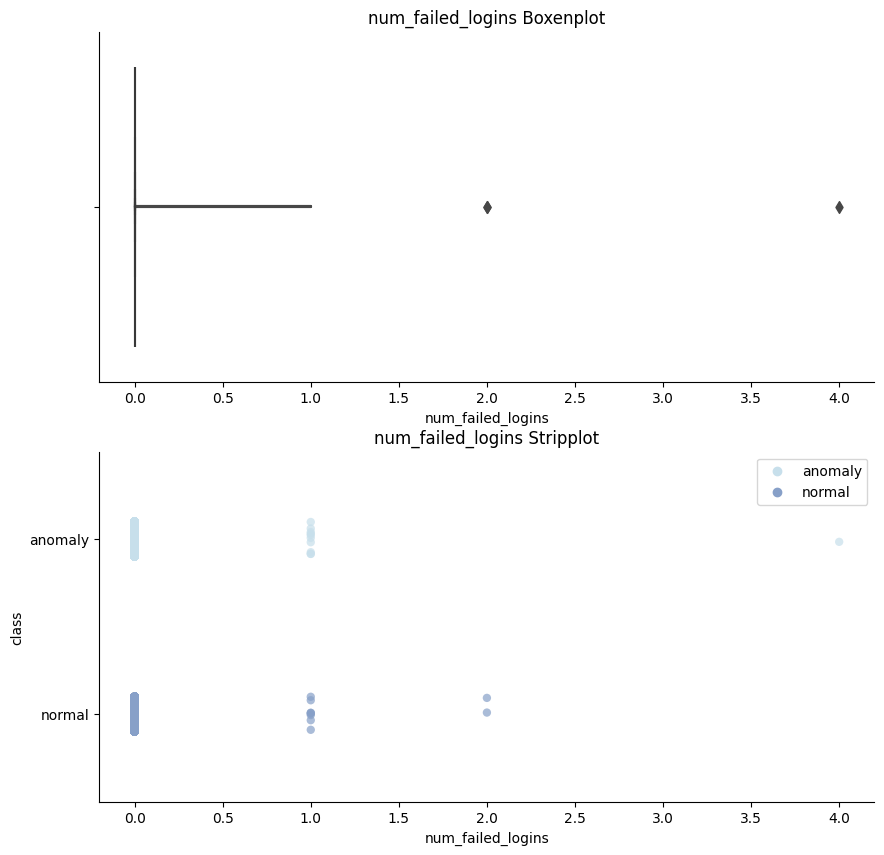

<ipython-input-12-b1d524e60dd1>:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], ax=ax[1], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


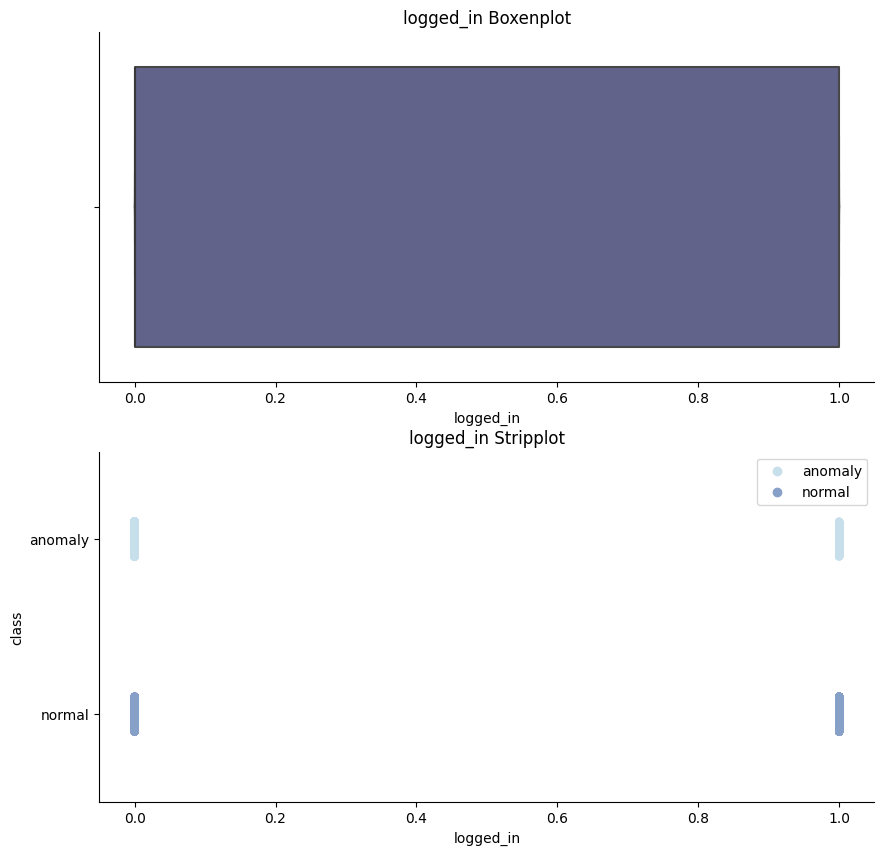

<ipython-input-12-b1d524e60dd1>:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], ax=ax[1], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


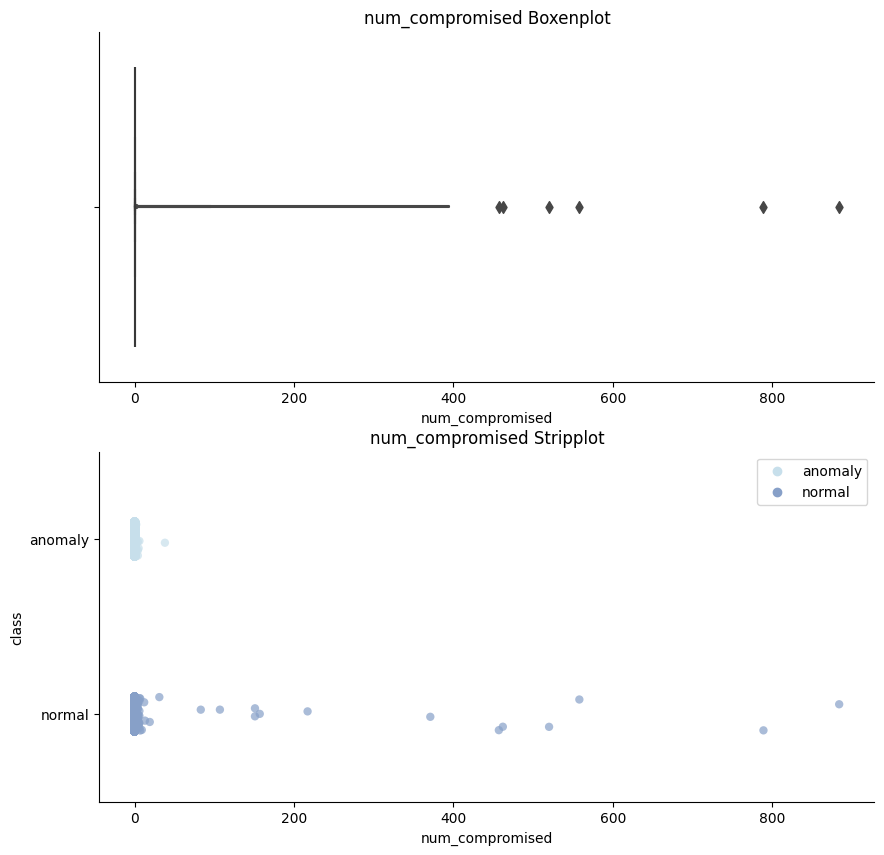

<ipython-input-12-b1d524e60dd1>:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], ax=ax[1], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


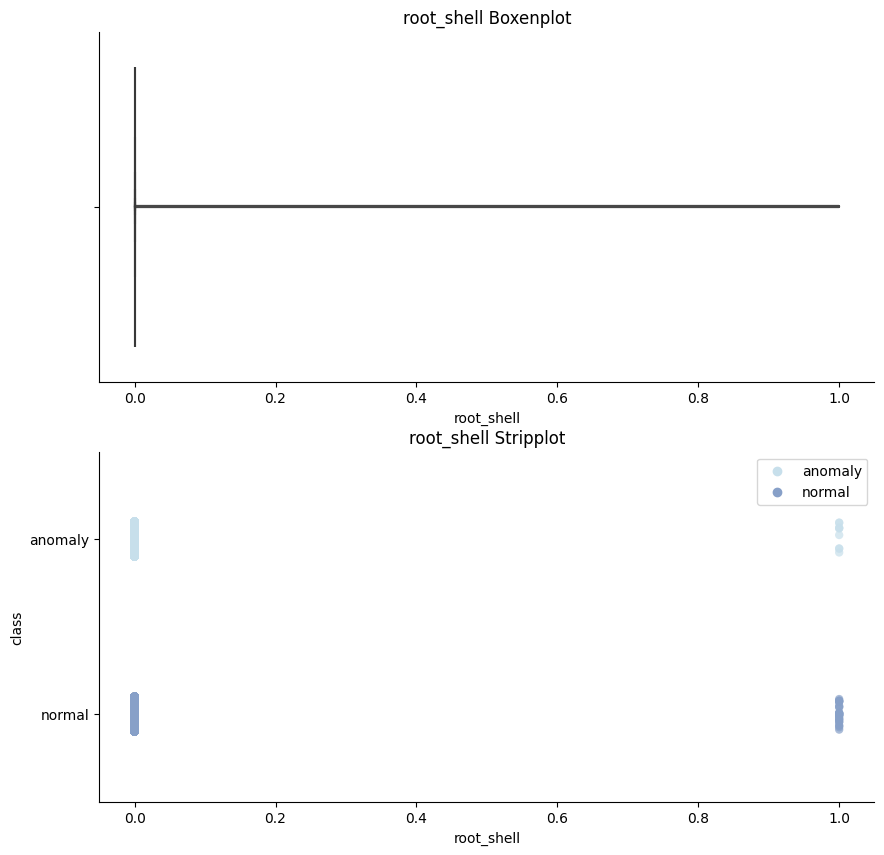

<ipython-input-12-b1d524e60dd1>:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], ax=ax[1], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


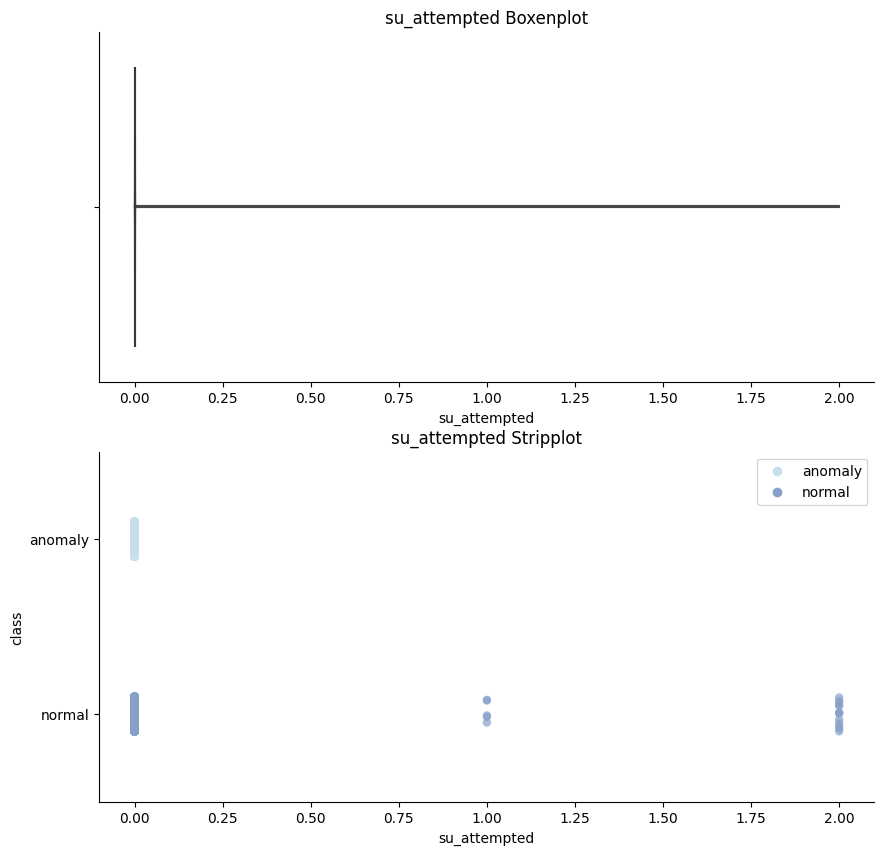

<ipython-input-12-b1d524e60dd1>:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], ax=ax[1], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


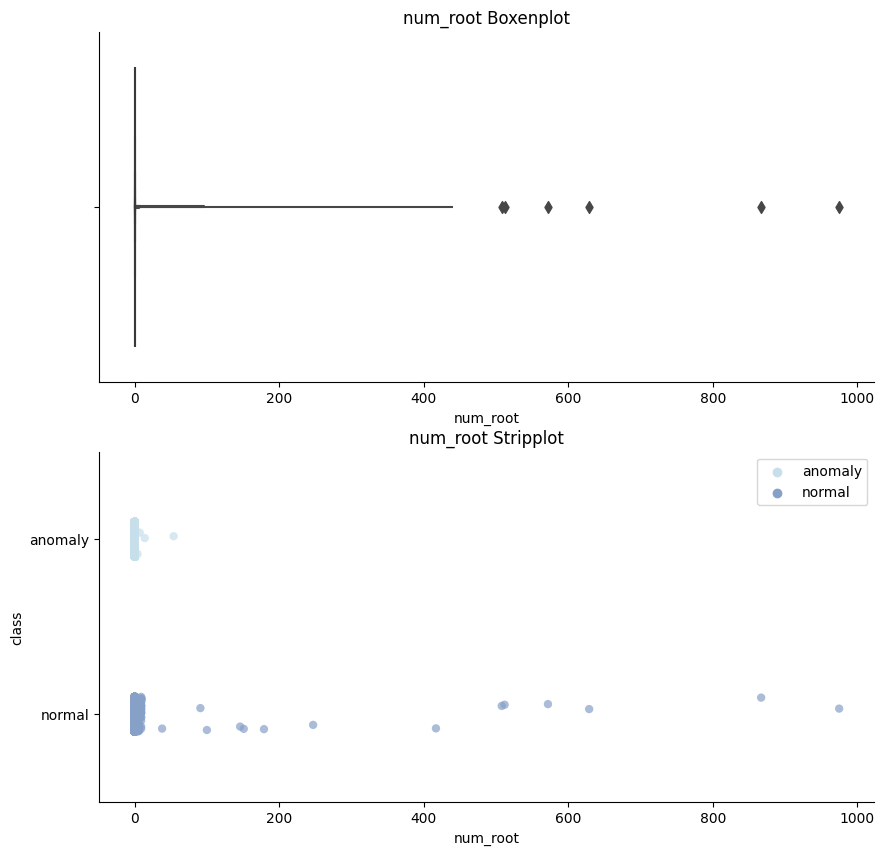

<ipython-input-12-b1d524e60dd1>:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], ax=ax[1], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


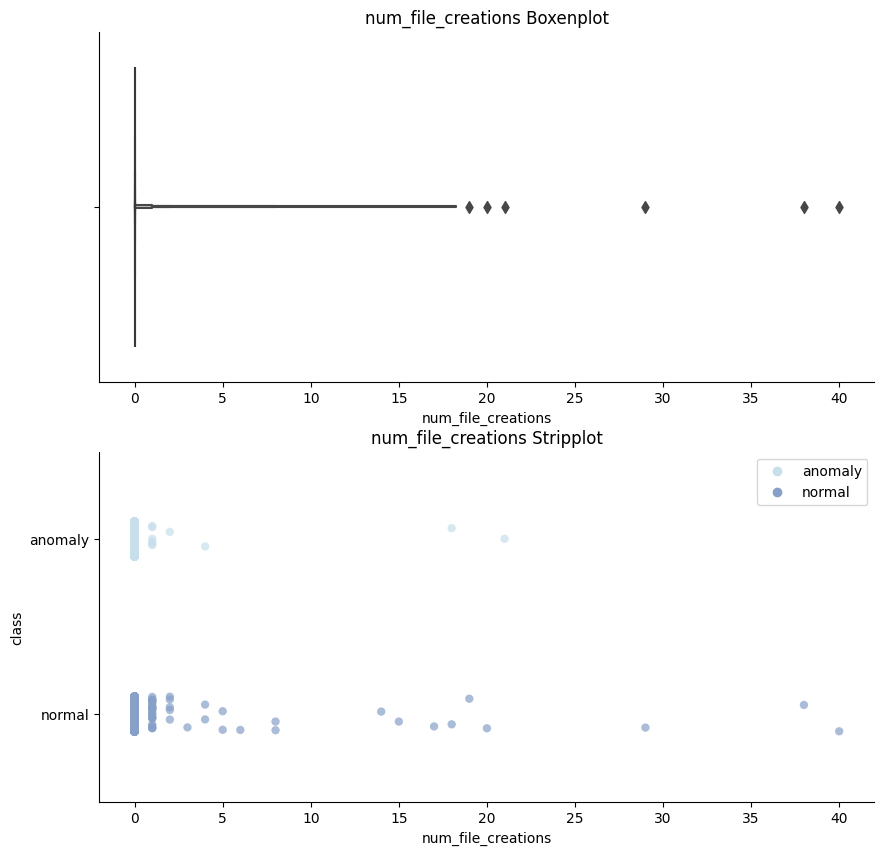

<ipython-input-12-b1d524e60dd1>:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], ax=ax[1], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


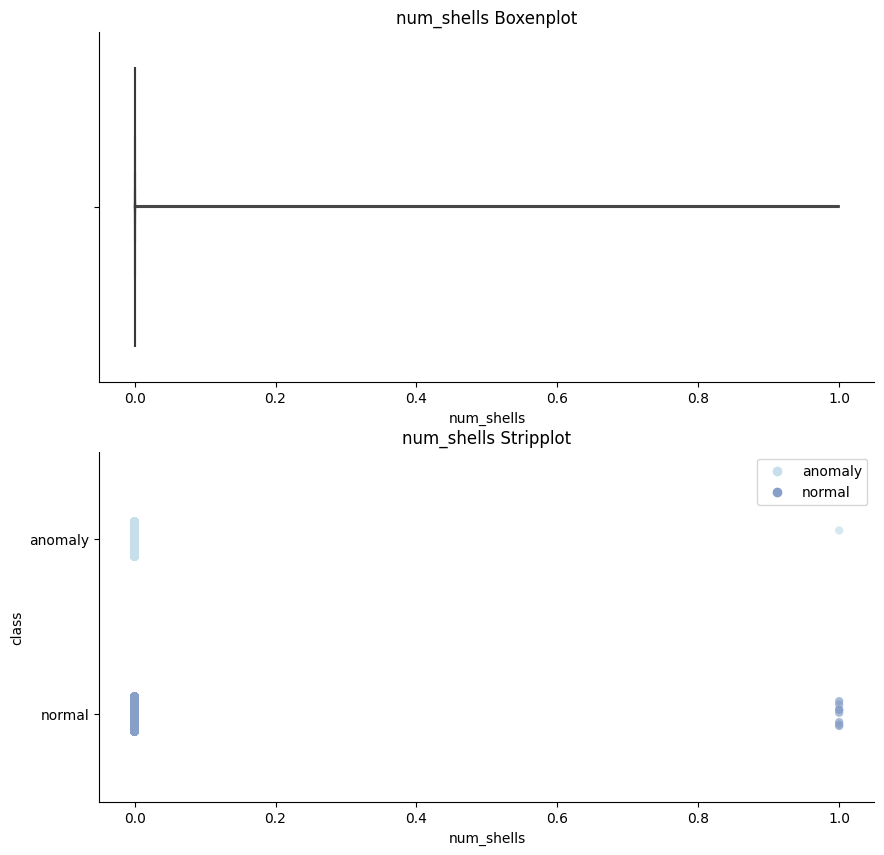

<ipython-input-12-b1d524e60dd1>:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], ax=ax[1], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


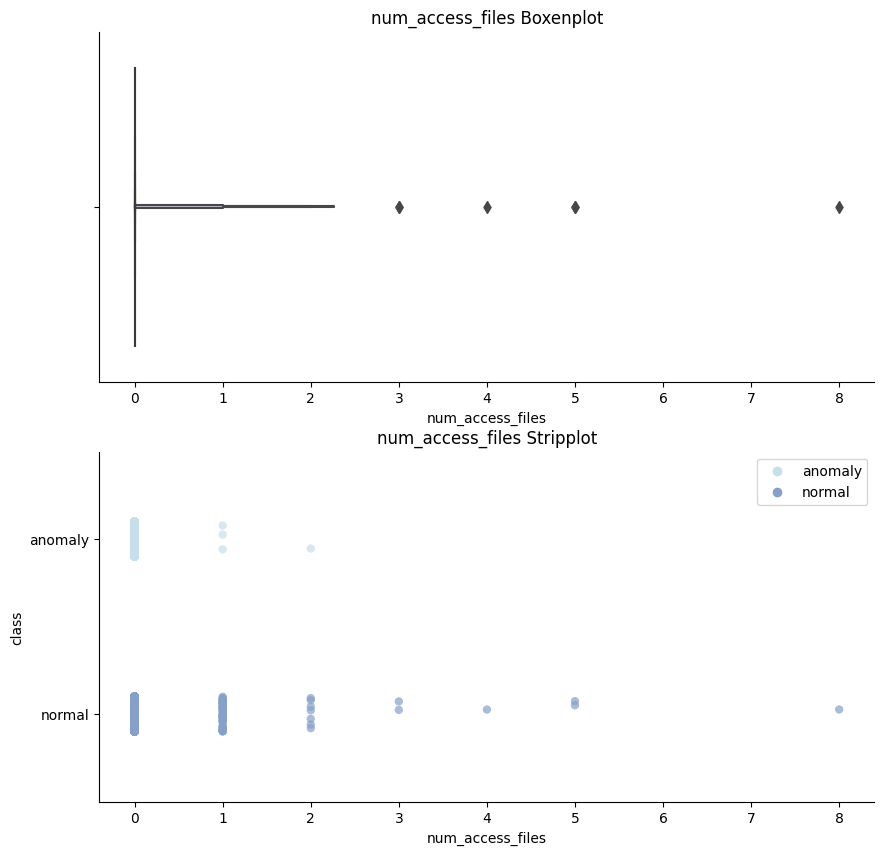

<ipython-input-12-b1d524e60dd1>:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], ax=ax[1], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


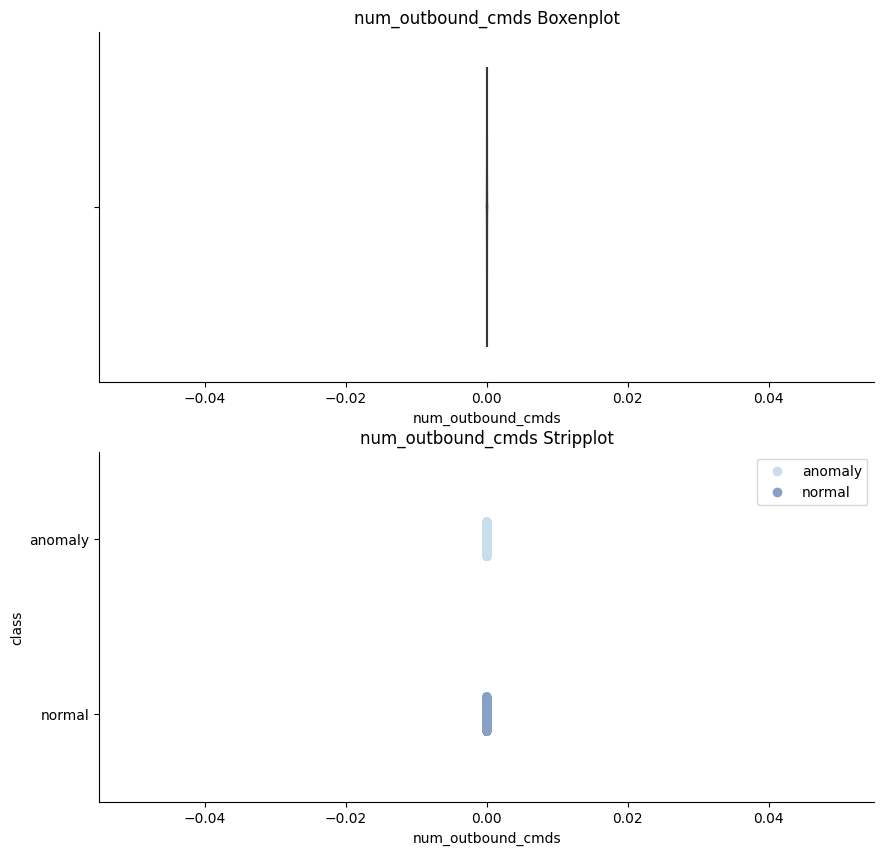

<ipython-input-12-b1d524e60dd1>:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], ax=ax[1], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


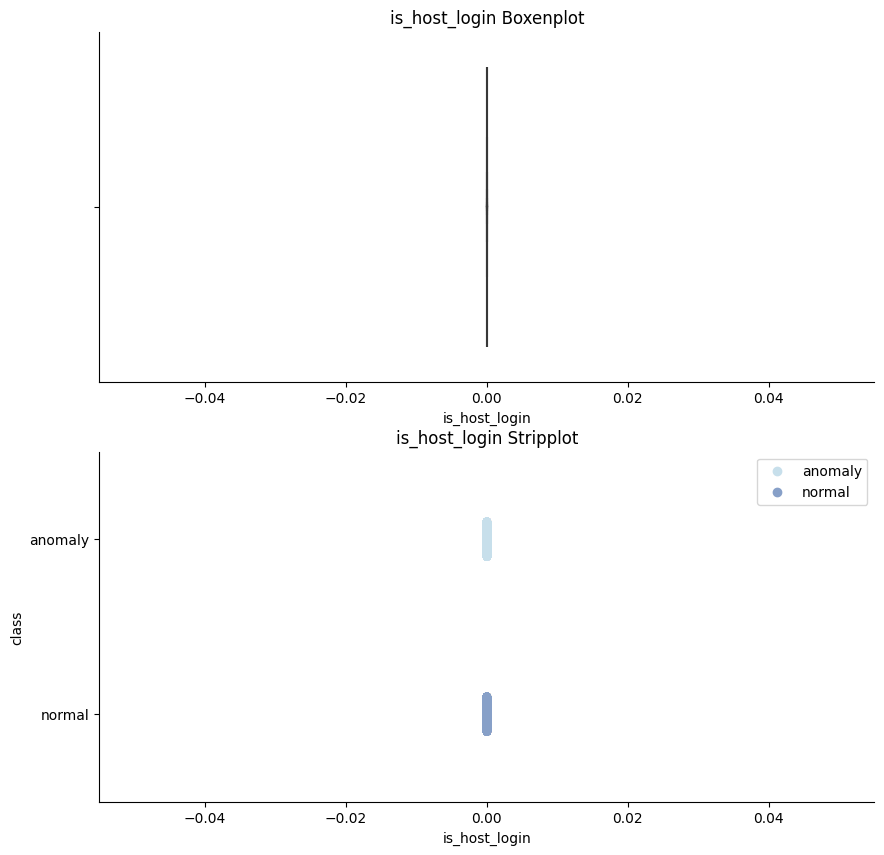

<ipython-input-12-b1d524e60dd1>:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], ax=ax[1], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


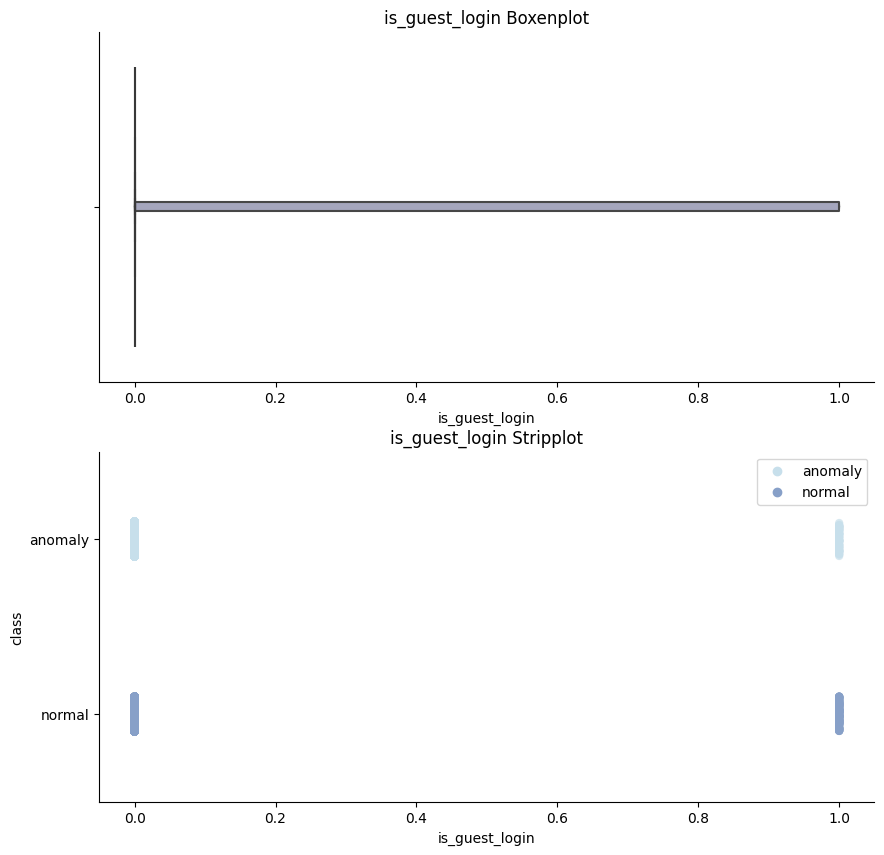

<ipython-input-12-b1d524e60dd1>:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], ax=ax[1], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


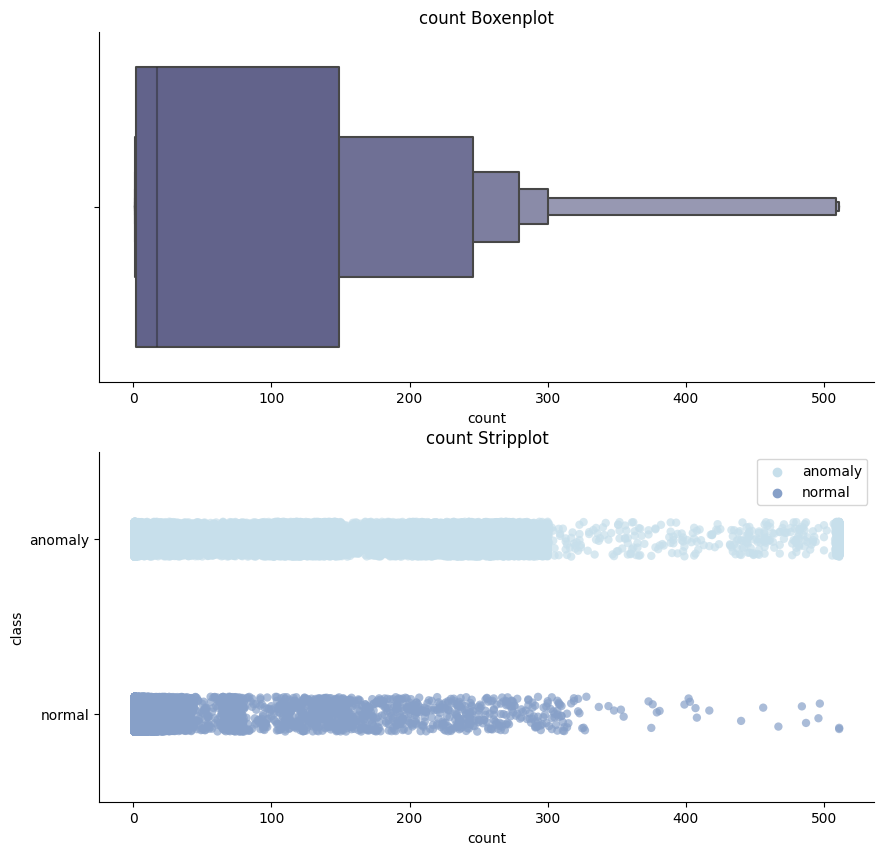

<ipython-input-12-b1d524e60dd1>:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], ax=ax[1], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


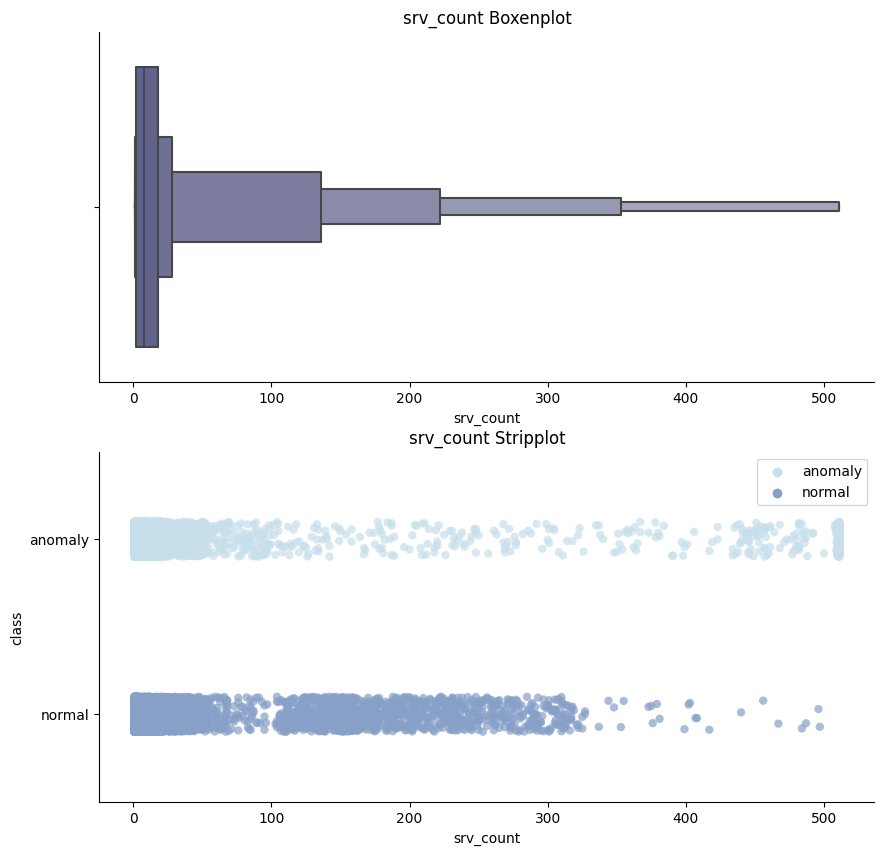

<ipython-input-12-b1d524e60dd1>:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], ax=ax[1], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


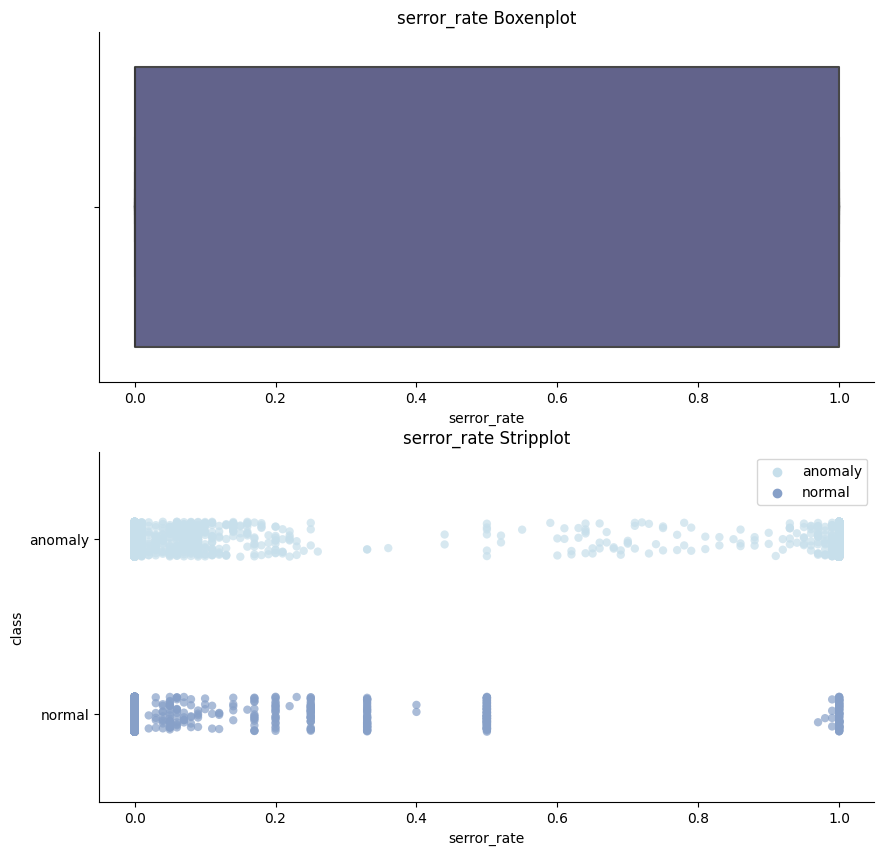

<ipython-input-12-b1d524e60dd1>:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], ax=ax[1], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


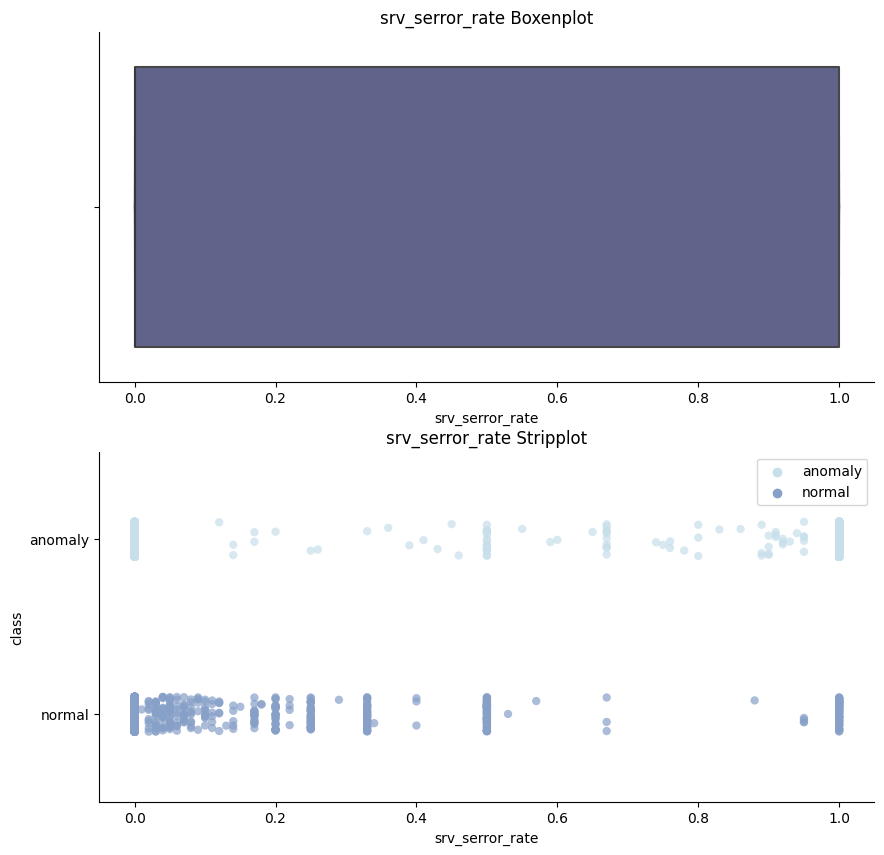

<ipython-input-12-b1d524e60dd1>:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], ax=ax[1], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


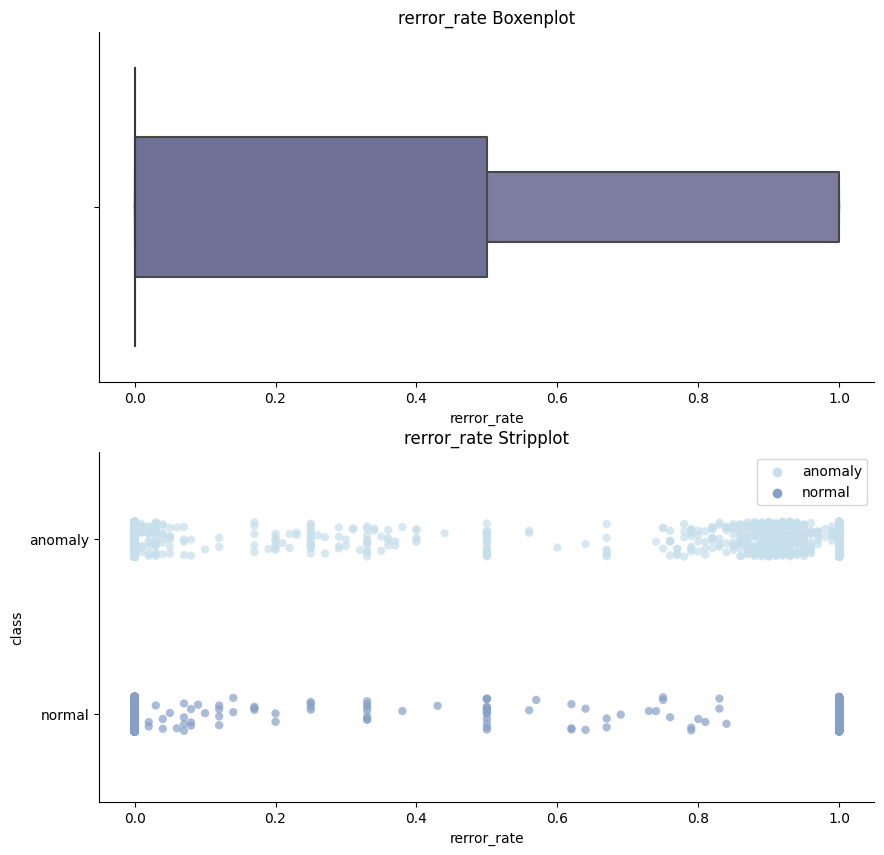

<ipython-input-12-b1d524e60dd1>:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], ax=ax[1], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


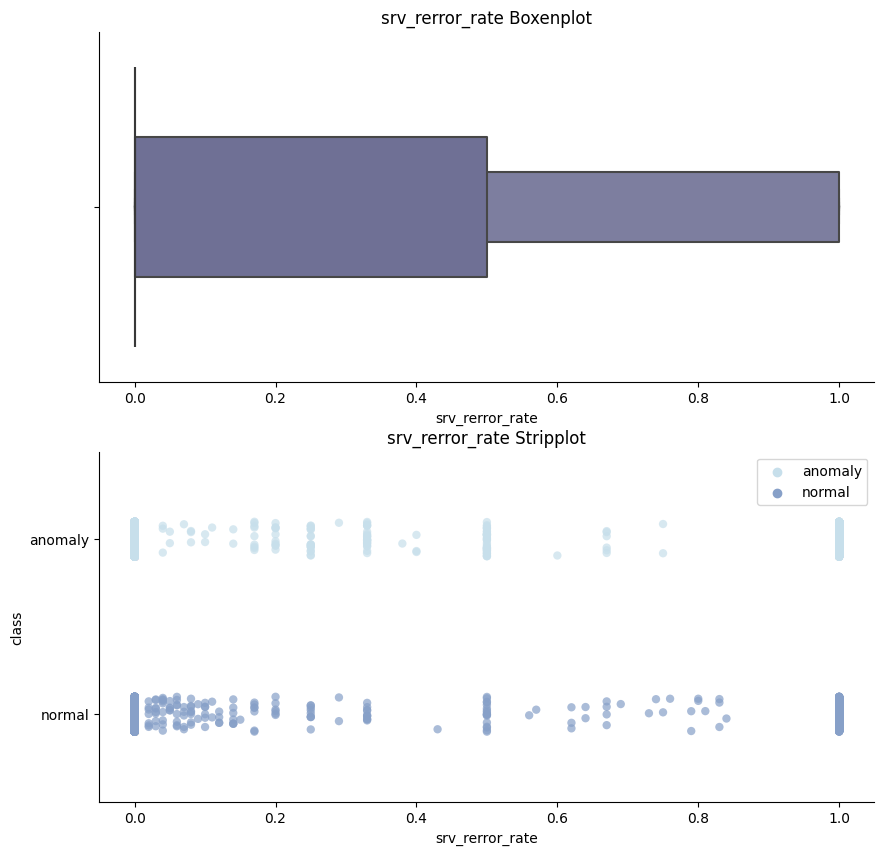

<ipython-input-12-b1d524e60dd1>:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], ax=ax[1], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


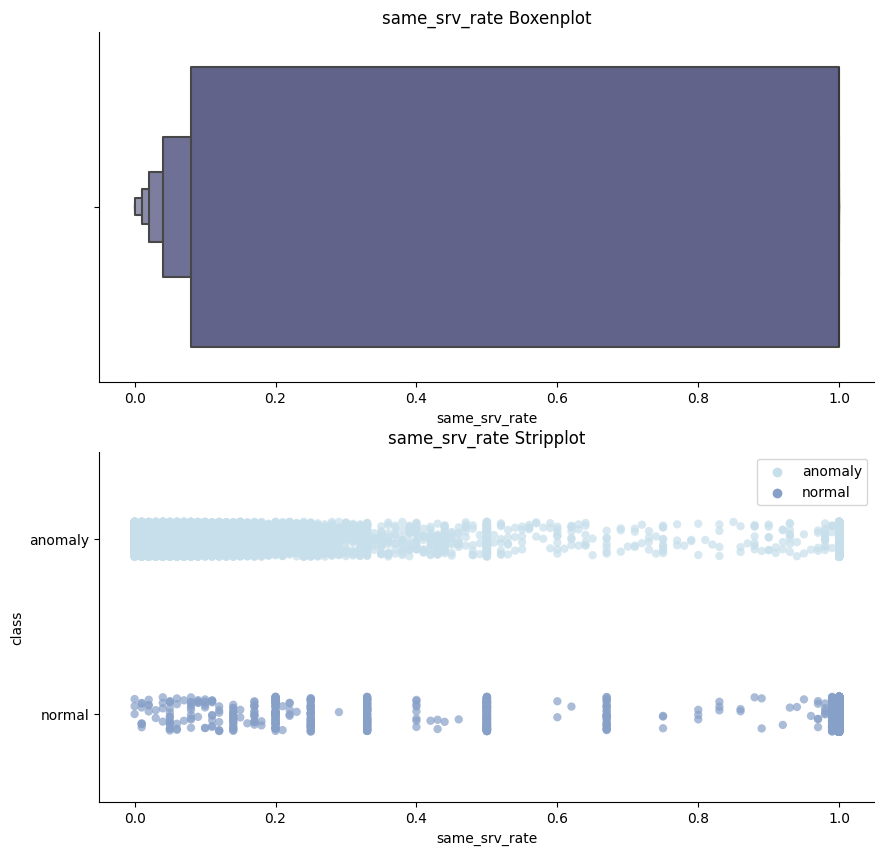

<ipython-input-12-b1d524e60dd1>:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], ax=ax[1], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


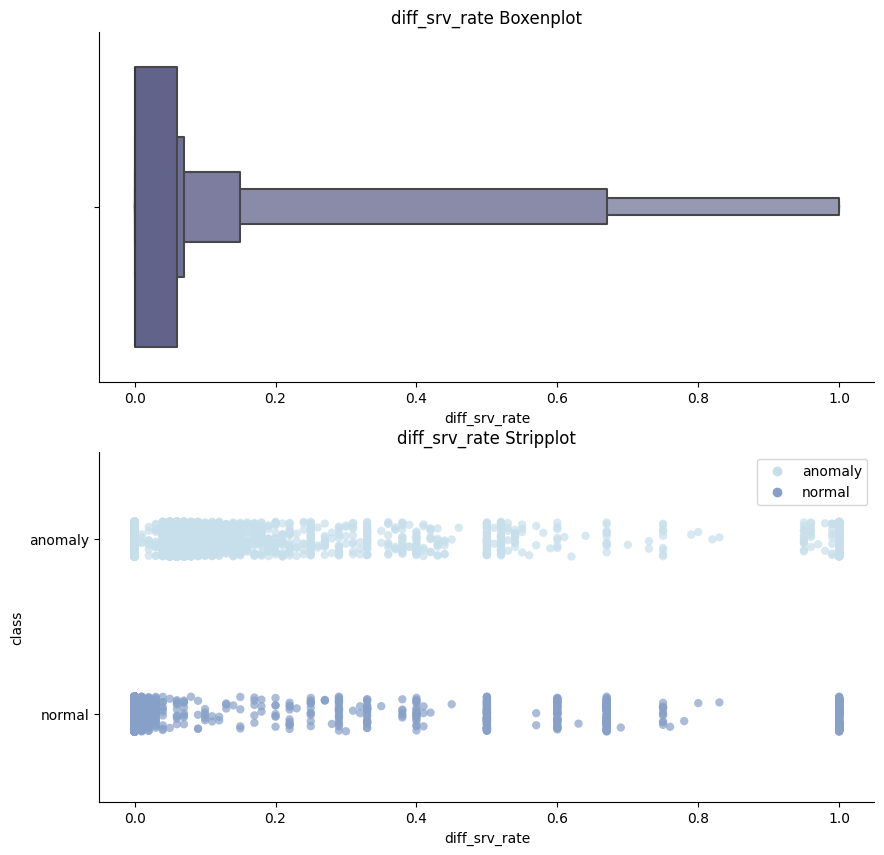

<ipython-input-12-b1d524e60dd1>:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], ax=ax[1], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


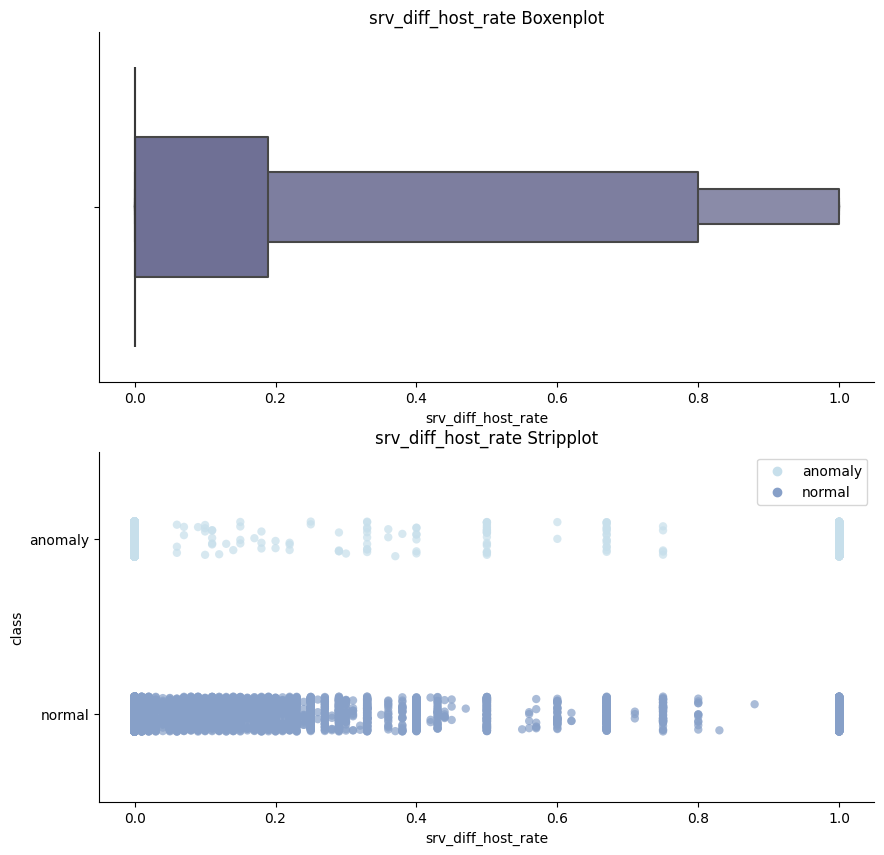

<ipython-input-12-b1d524e60dd1>:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], ax=ax[1], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


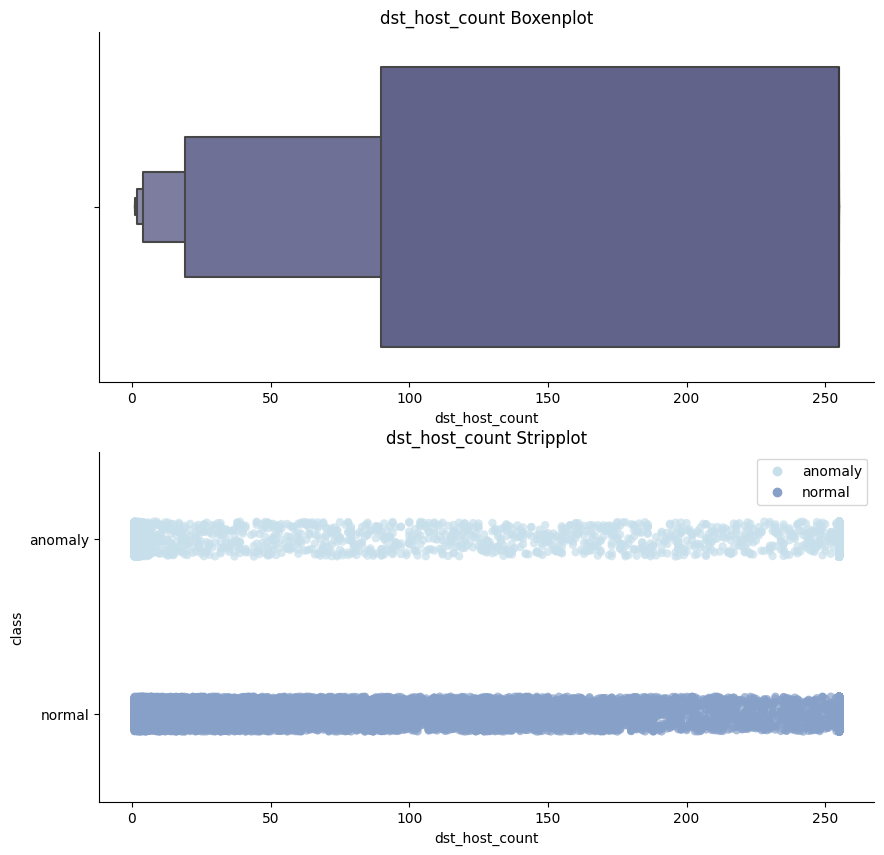

<ipython-input-12-b1d524e60dd1>:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], ax=ax[1], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


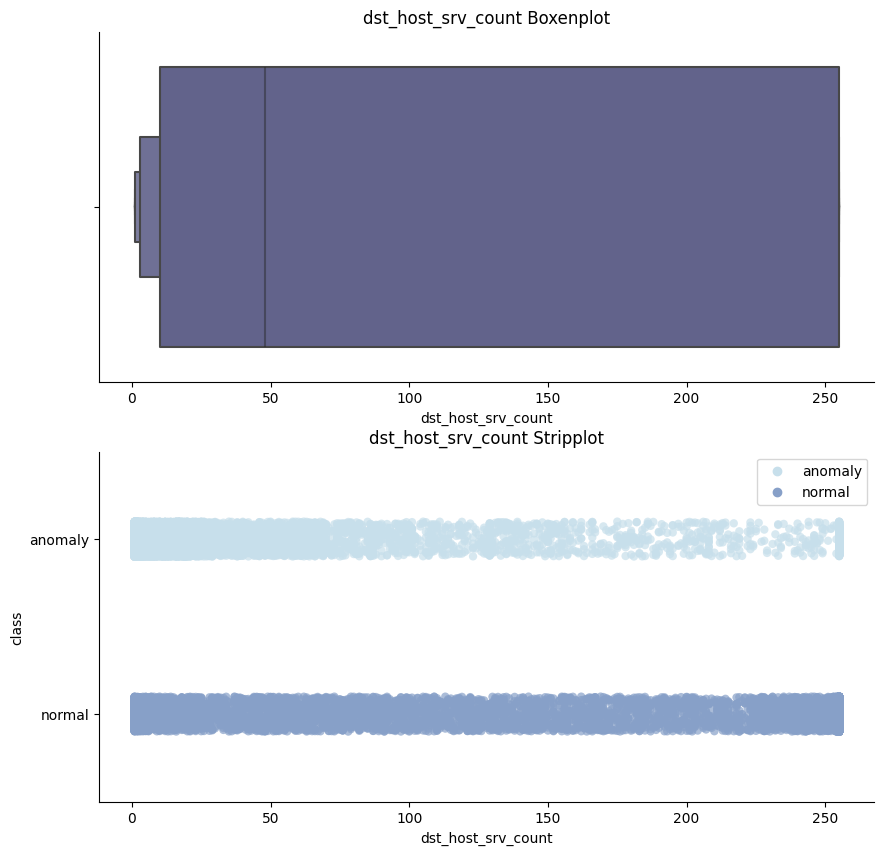

<ipython-input-12-b1d524e60dd1>:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], ax=ax[1], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


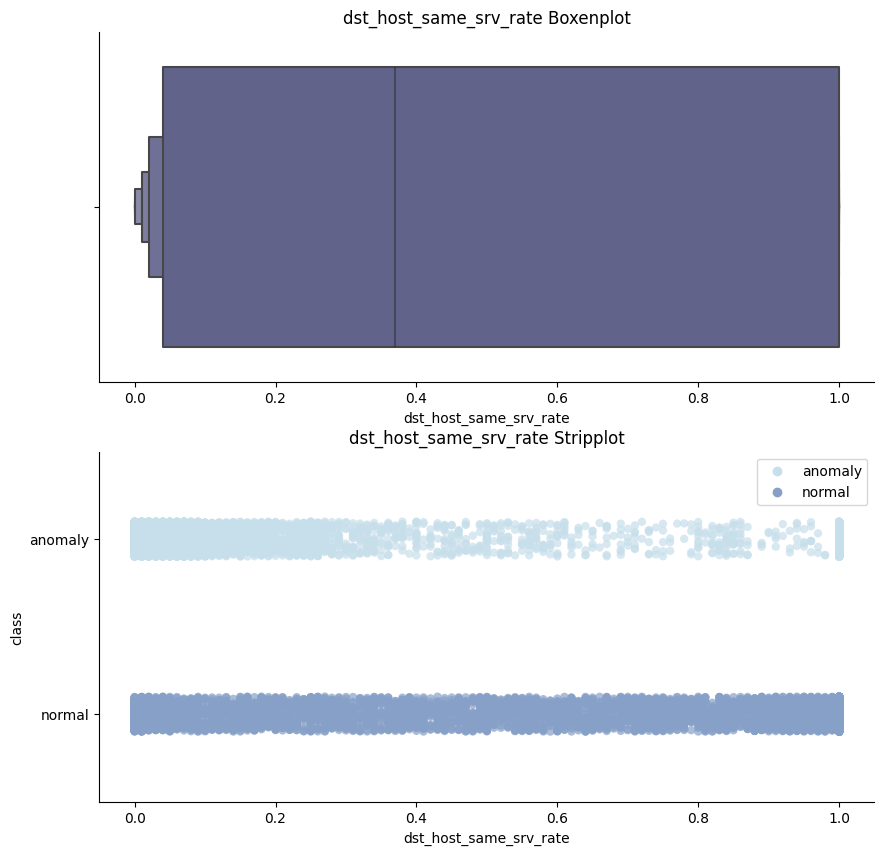

<ipython-input-12-b1d524e60dd1>:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], ax=ax[1], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


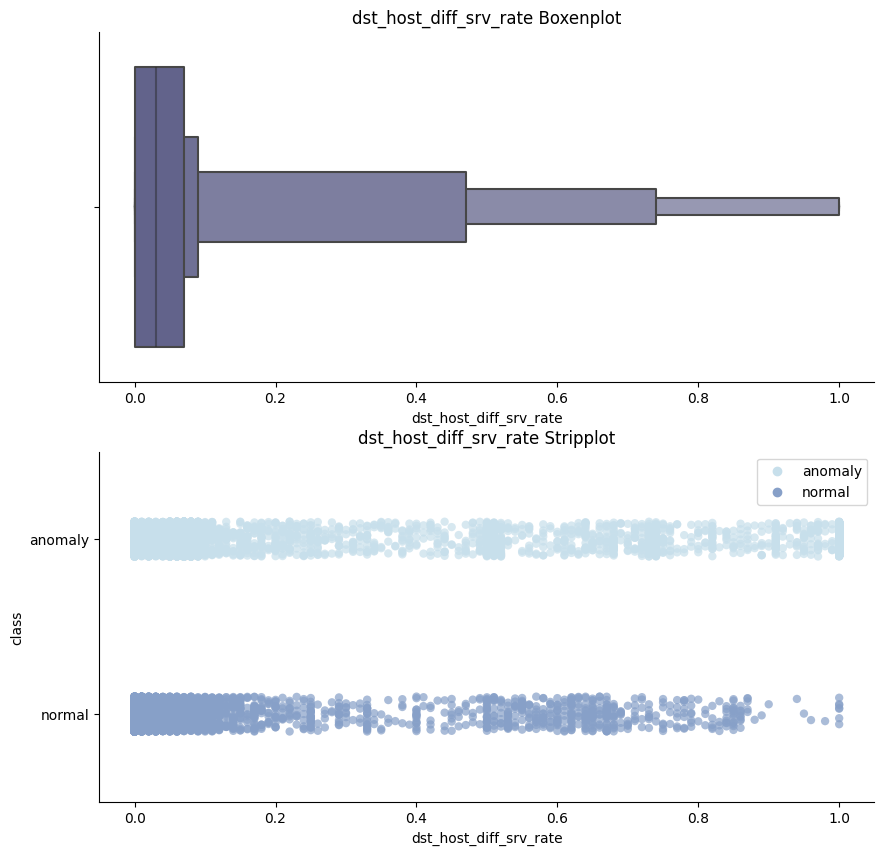

<ipython-input-12-b1d524e60dd1>:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], ax=ax[1], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


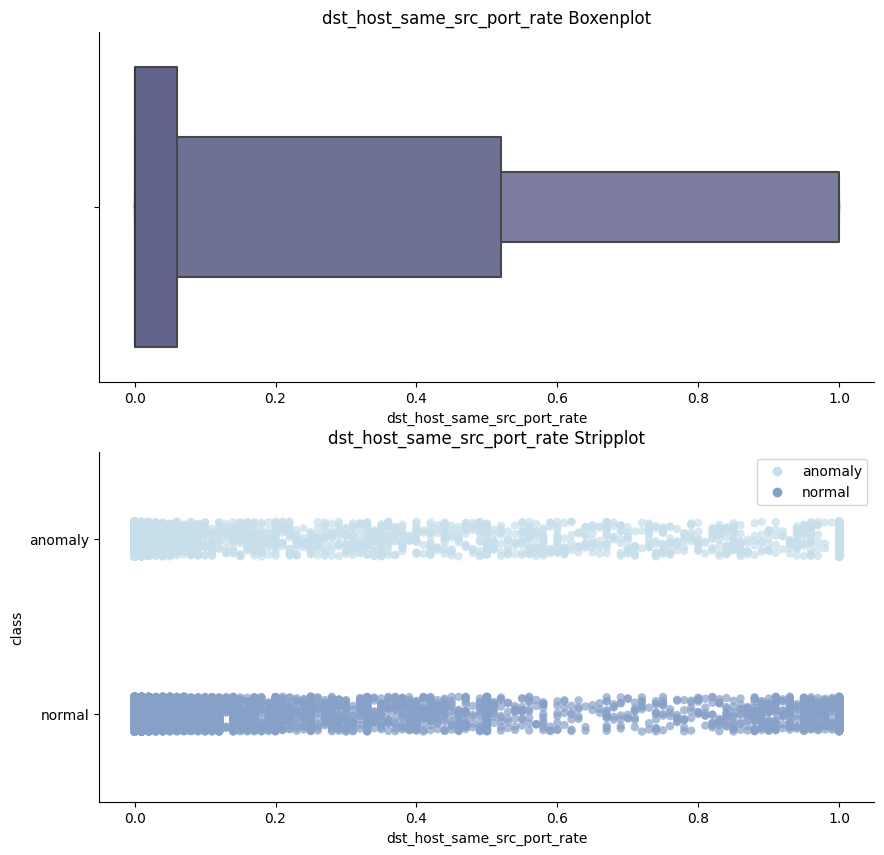

<ipython-input-12-b1d524e60dd1>:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], ax=ax[1], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


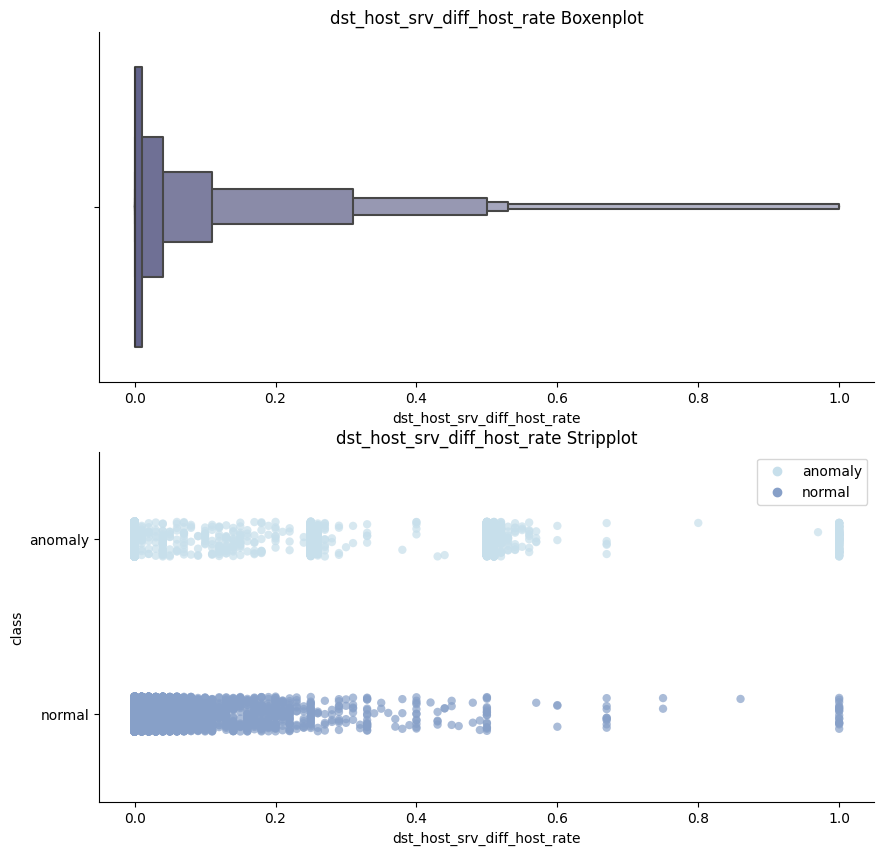

<ipython-input-12-b1d524e60dd1>:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], ax=ax[1], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


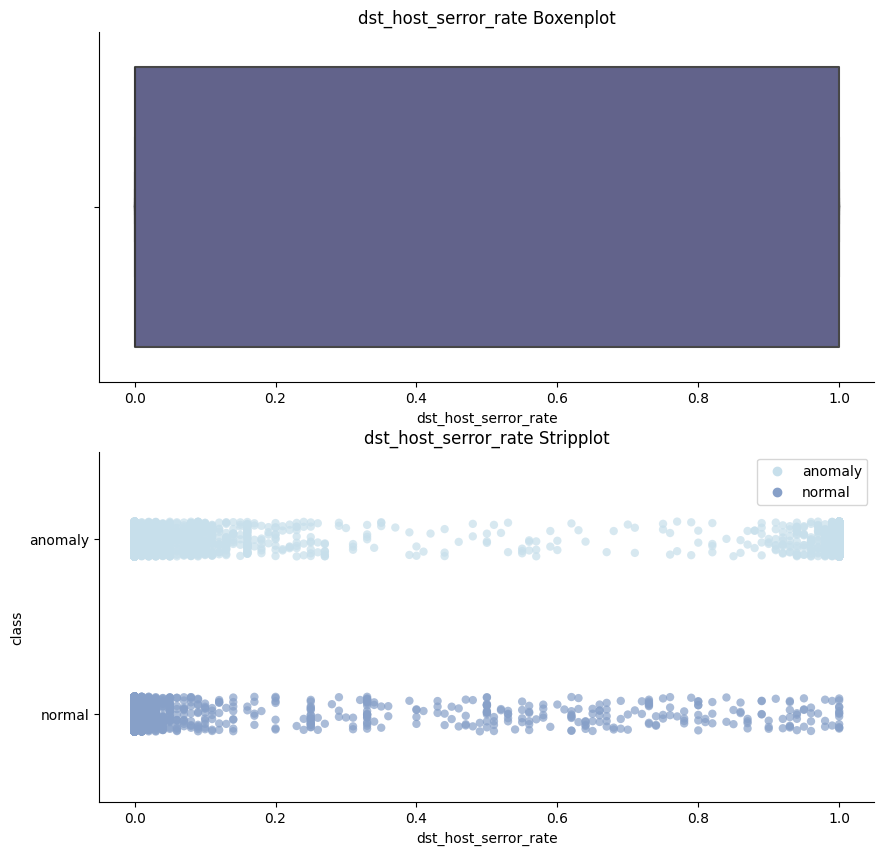

<ipython-input-12-b1d524e60dd1>:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], ax=ax[1], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


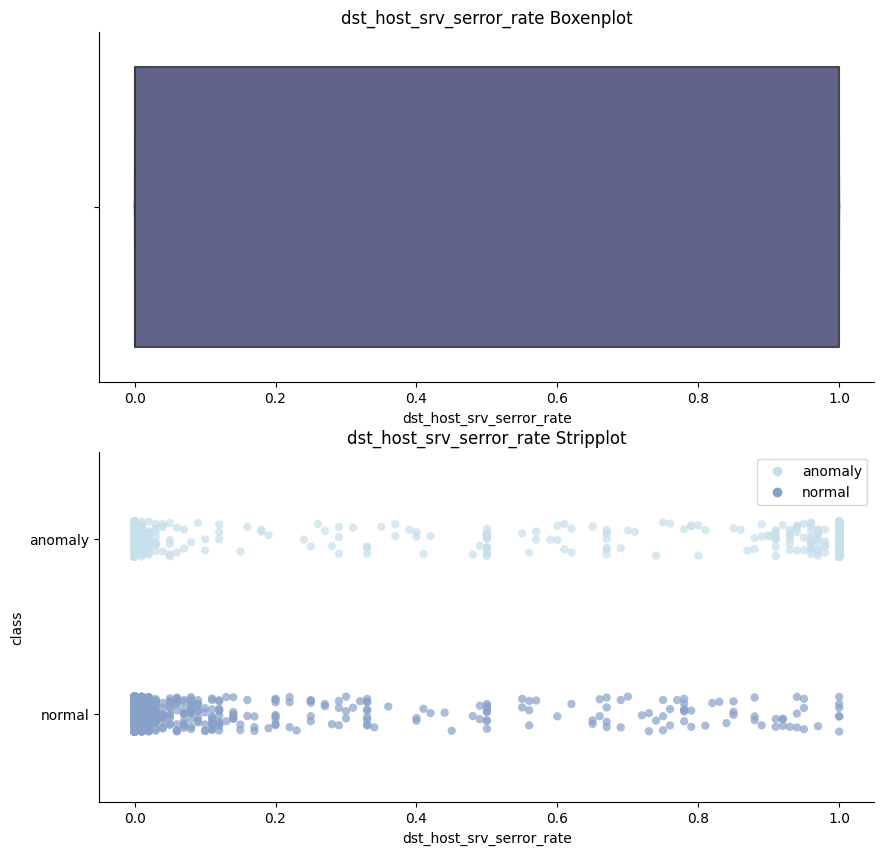

<ipython-input-12-b1d524e60dd1>:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], ax=ax[1], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


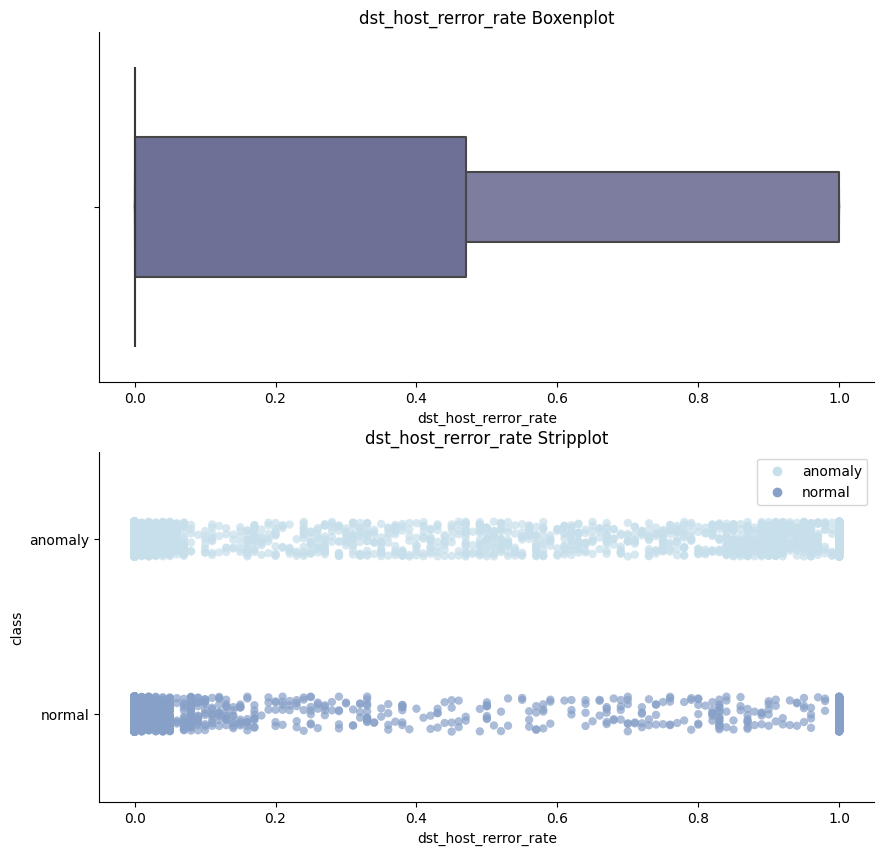

<ipython-input-12-b1d524e60dd1>:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], ax=ax[1], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


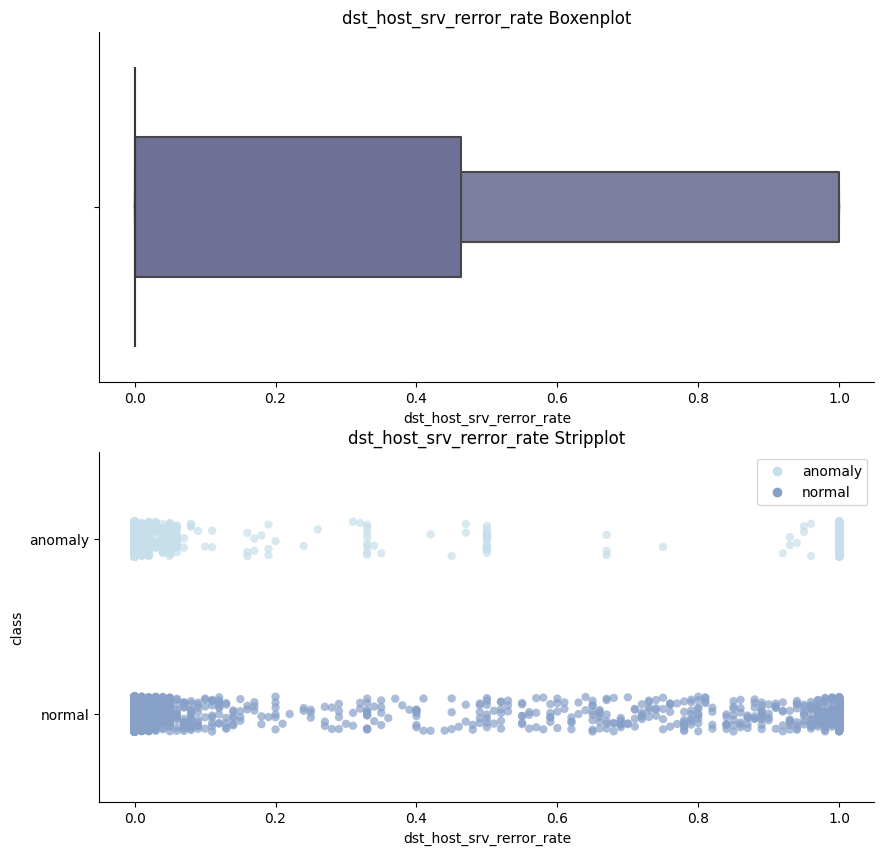

In [12]:
#we check for outliers using these plots
#conclusion: there isnt much outliers to worry about so thats good
#hada 7awel ma t7oto bl reasearch bas l2ni ltshto bas khali 3shan nwrji eni shayaket 3al outliers

import seaborn as sns
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt

custom_palette = sns.color_palette("ch:s=.25,rot=-.25",n_colors=4)
#
for col in df.iloc[:, 1:]:             # we ignore id column
    if col != 'class' and is_numeric_dtype(df[col]):
#
        fig, ax = plt.subplots(2, 1, figsize=(10, 10))
        g1 = sns.boxenplot(x=df[col], ax=ax[0], color=custom_palette[2], linewidth=1.5)
        g2 = sns.stripplot(x=df[col], y=df['class'], ax=ax[1], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)
#
        ax[0].set_title(f"{col} Boxenplot")
        ax[0].set_xlabel(col)
        ax[1].set_title(f"{col} Stripplot")
        ax[1].set_xlabel(col)
        ax[1].set_ylabel("class")
        ax[0].spines['top'].set_visible(False)
        ax[0].spines['right'].set_visible(False)
        ax[1].spines['top'].set_visible(False)
        ax[1].spines['right'].set_visible(False)
#
#
        g2.legend(loc='upper right')
        plt.show()

In [13]:
#there are no duplicate values so that is also good
df.duplicated().sum()

0

In [14]:
#https://analyticsindiamag.com/a-complete-guide-to-categorical-data-encoding/#:~:text=Encoding%20categorical%20data%20is%20a,provided%20to%20the%20different%20models.&text=In%20the%20field%20of%20data,preparation%20is%20a%20mandatory%20task.

#e8r2 3an el different categorical encoding techniques ya ghabi

#for the categorical features we used binary encoding
cat_features=["protocol_type","service","flag"]
bencoder= ce.BinaryEncoder(cols=cat_features,return_df=True)
df=bencoder.fit_transform(df) 

#for the target column we used label encoding
le = LabelEncoder()
le.fit(df["class"])
df["class"]=le.transform(df["class"])
df

,duration,protocol_type_0,protocol_type_1,service_0,service_1,service_2,service_3,service_4,service_5,service_6,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,0,1,0,0,0,0,0,0,1,...,26,0.10,0.05,0.00,0.00,1.00,1.0,0.00,0.0,0
1,0,0,1,0,0,0,0,0,0,1,...,19,0.07,0.07,0.00,0.00,0.00,0.0,1.00,1.0,0
2,0,0,1,0,0,0,0,0,0,1,...,9,0.04,0.05,0.00,0.00,1.00,1.0,0.00,0.0,0
3,0,0,1,0,0,0,0,0,0,1,...,15,0.06,0.07,0.00,0.00,1.00,1.0,0.00,0.0,0
4,0,0,1,0,0,0,0,0,1,0,...,23,0.09,0.05,0.00,0.00,1.00,1.0,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,0,0,1,0,0,0,1,1,1,1,...,255,1.00,0.00,0.02,0.03,0.01,0.0,0.00,0.0,1
23482,0,0,1,0,0,0,1,1,1,1,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,1
23483,63,0,1,0,0,0,1,1,1,1,...,255,1.00,0.00,0.25,0.02,0.00,0.0,0.00,0.0,1
23484,0,0,1,0,0,0,0,0,1,1,...,73,0.07,0.09,0.07,0.03,0.00,0.0,0.02,0.0,1


In [15]:
#scaling
#https://www.analyticsvidhya.com/blog/2021/05/feature-scaling-techniques-in-python-a-complete-guide/
#e8r2 3an el scaling w eshr7 sho hweh

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = df.drop('class',axis=1)
y = df['class']

X = scaler.fit_transform(X)

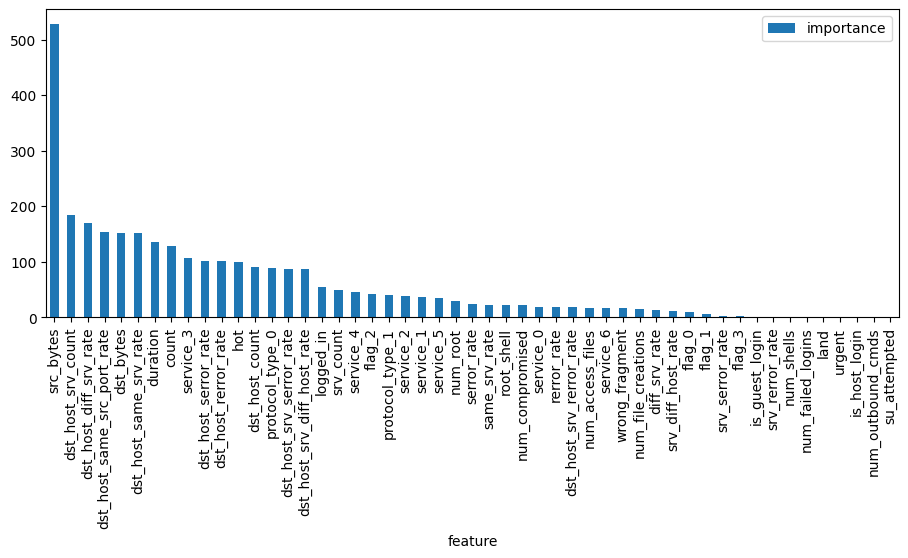

In [16]:
#feature selection
#e8r2 3an el feature selection
#we will use a simple lgbm classifier to get the most important features

from lightgbm import LGBMClassifier
import numpy as np

lfc = LGBMClassifier();
lfc.fit(X, y);

score = np.round(lfc.feature_importances_,3)
importances = pd.DataFrame({'feature':df.drop('class',axis=1).columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();
plt.savefig('lgbm_importances-01.png')

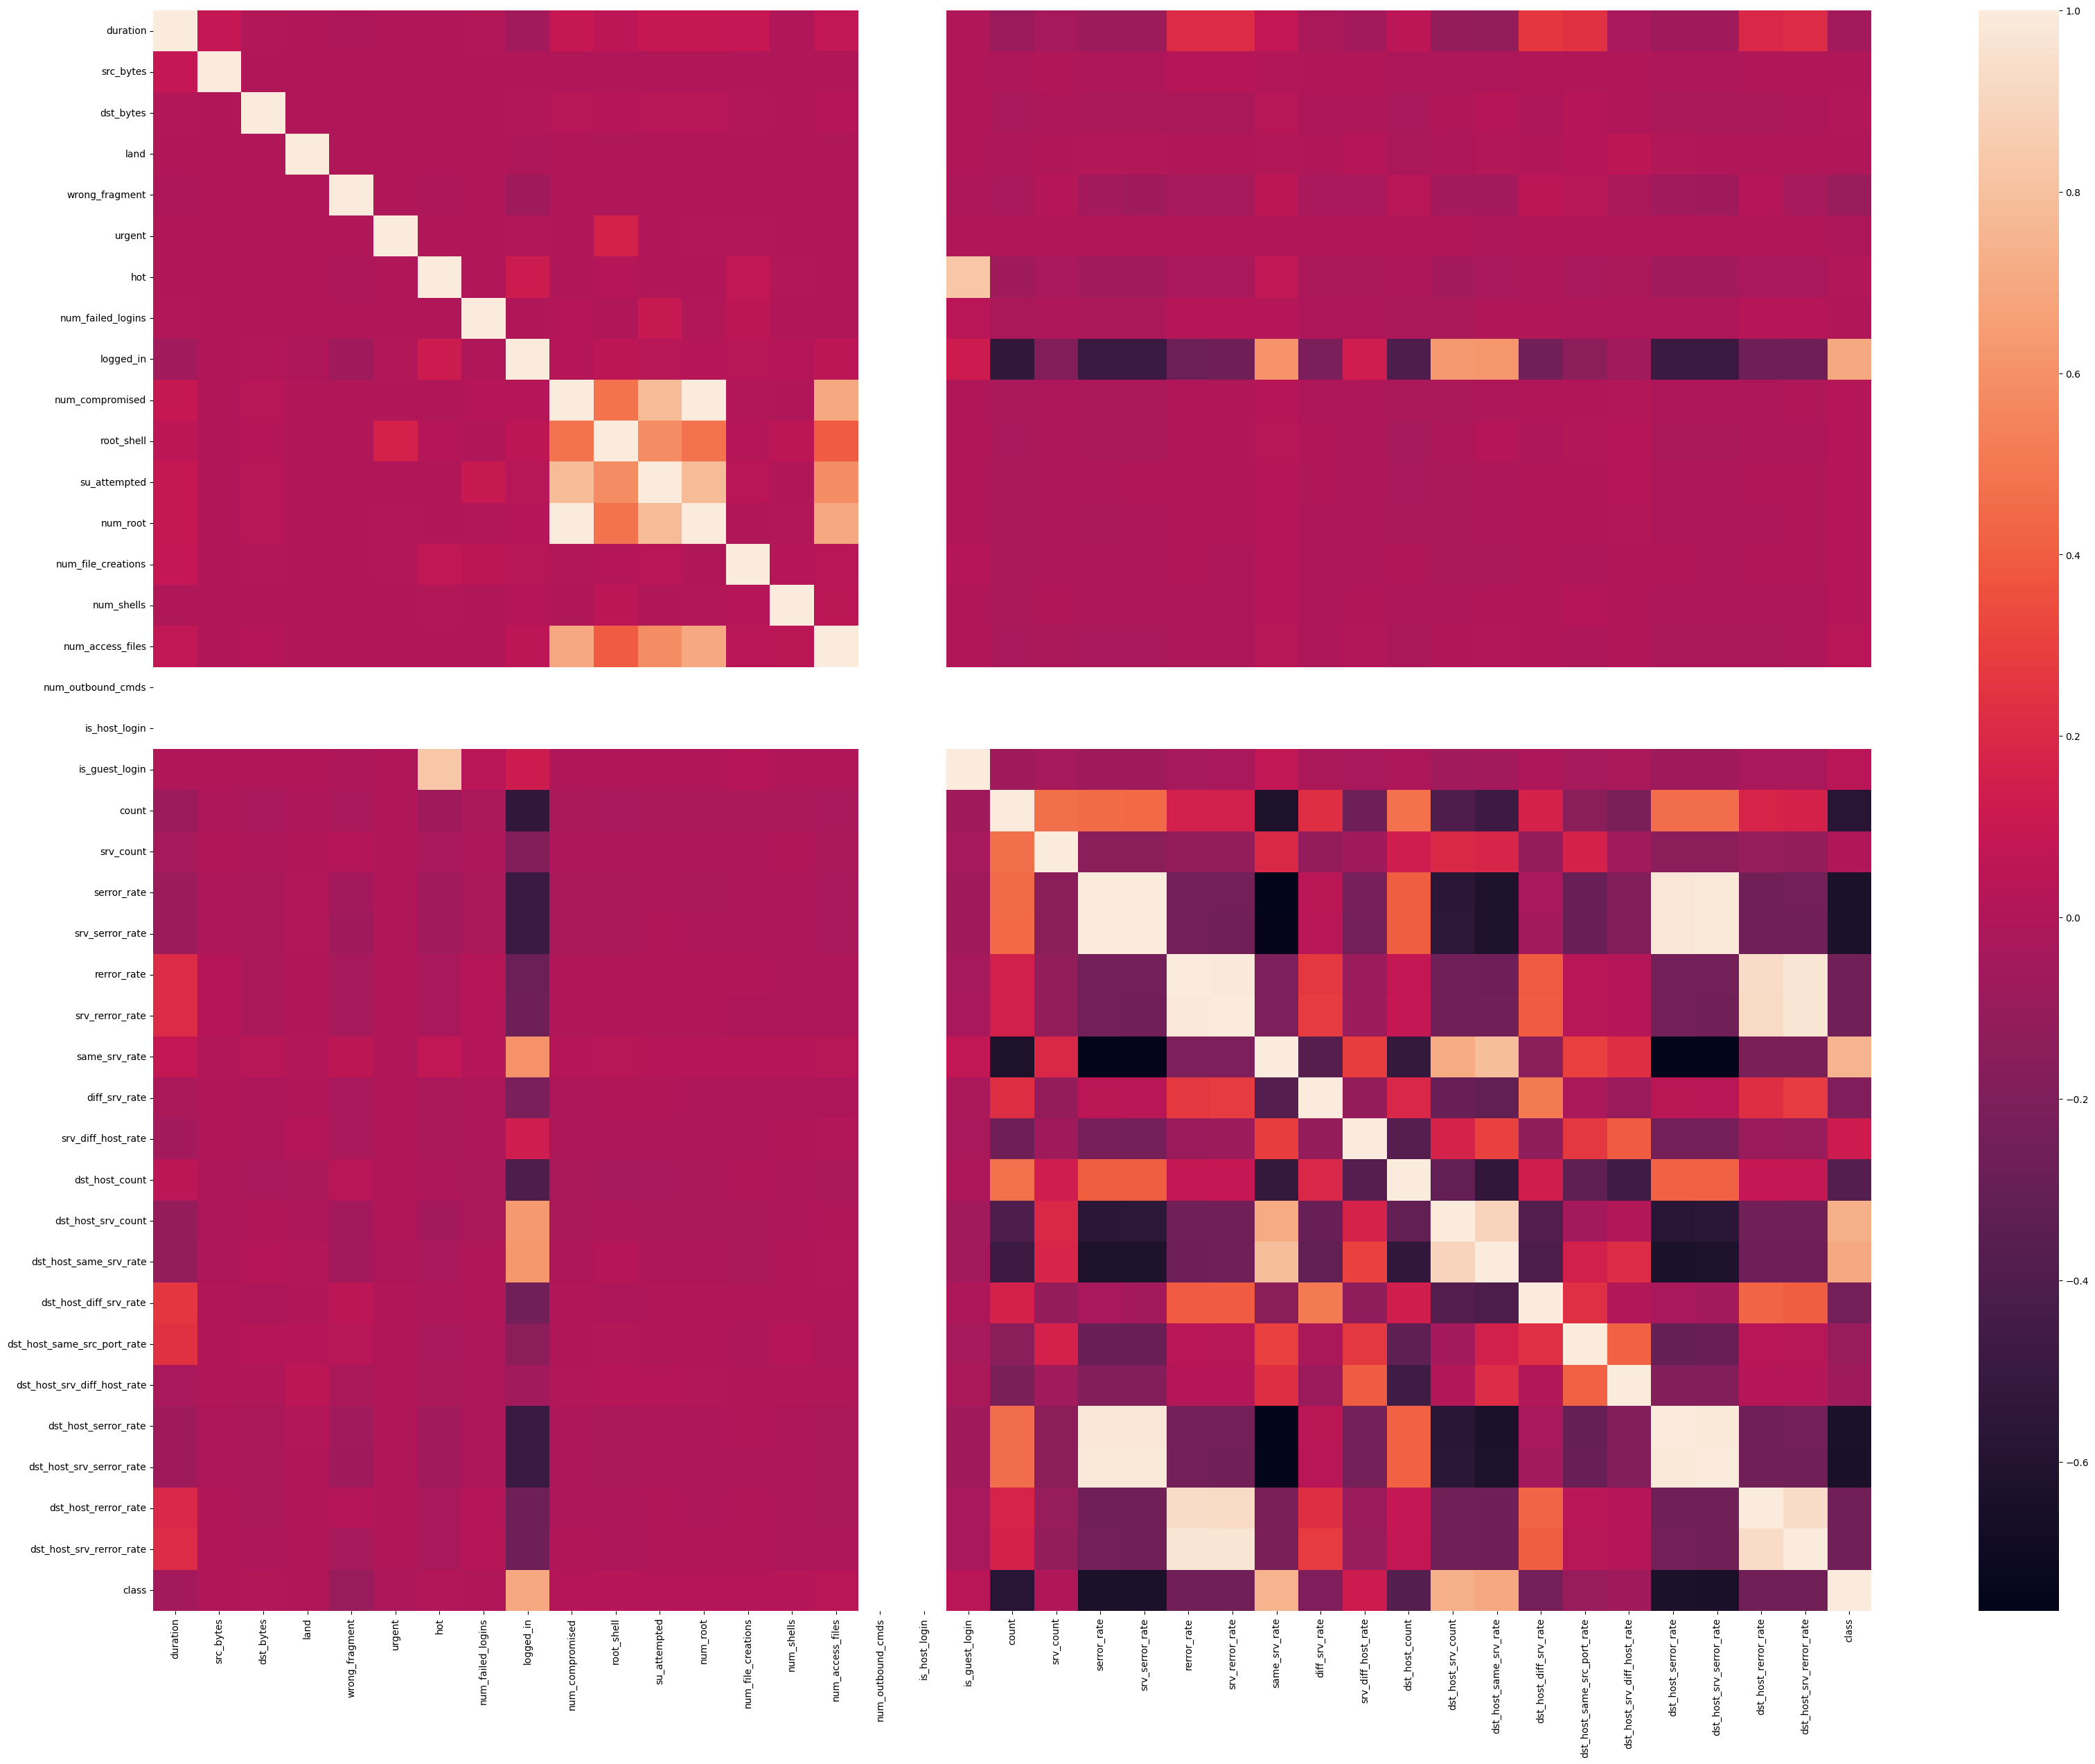

In [17]:
plt.figure(figsize=(40,30))

sns.heatmap(df.drop(['protocol_type_0', 'protocol_type_1', 'service_0',
       'service_1', 'service_2', 'service_3', 'service_4', 'service_5',
       'service_6', 'flag_0', 'flag_1', 'flag_2', 'flag_3'],axis=1).corr());
plt.savefig('heatmap.png')

In [18]:
#after some testing these are the most important features
imp_features=['src_bytes', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_srv_rate', 'dst_host_same_src_port_rate', 'dst_bytes',
       'duration', 'dst_host_rerror_rate', 'hot', 'dst_host_serror_rate',
        'count', 'dst_host_count',
       'dst_host_srv_diff_host_rate', 'dst_host_srv_serror_rate', 'srv_count', 'logged_in', 
       'same_srv_rate', 'num_root','protocol_type_0', 'protocol_type_1', 'service_0',
       'service_1', 'service_2', 'service_3', 'service_4', 'service_5',
       'service_6', 'flag_0', 'flag_1', 'flag_2', 'flag_3']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
#now we will train 3 base models then we will optimize one of them

In [21]:
lgb_model = LGBMClassifier()
lgb_model.fit(X_train, y_train)

lgb_train, lgb_test = lgb_model.score(X_train , y_train), lgb_model.score(X_test , y_test)

print(f"Training Score: {lgb_train}")
print(f"Test Score: {lgb_test}")

Training Score: 1.0
Test Score: 0.998297147722435


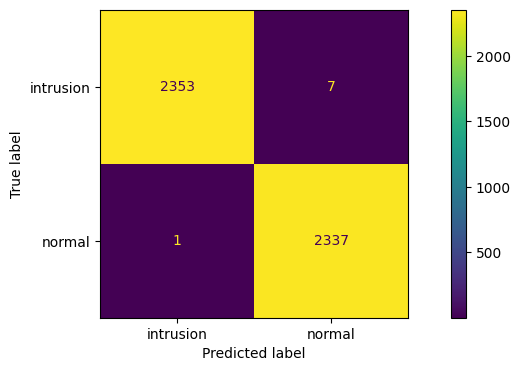

In [22]:
#for lgb before optimization
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix((y_test), lgb_model.predict(X_test)),display_labels = ["intrusion", "normal"]).plot()
plt.savefig('f1.png')

In [23]:
print(classification_report(le.inverse_transform(y_test), le.inverse_transform(lgb_model.predict(X_test))))

              precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00      2360
      normal       1.00      1.00      1.00      2338

    accuracy                           1.00      4698
   macro avg       1.00      1.00      1.00      4698
weighted avg       1.00      1.00      1.00      4698



In [24]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(objective="binary:logistic")
xgb_model.fit(X_train, y_train)

xgb_train, xgb_test = xgb_model.score(X_train , y_train), xgb_model.score(X_test , y_test)

print(f"Training Score: {xgb_train}")
print(f"Test Score: {xgb_test}")

Training Score: 1.0
Test Score: 0.998297147722435


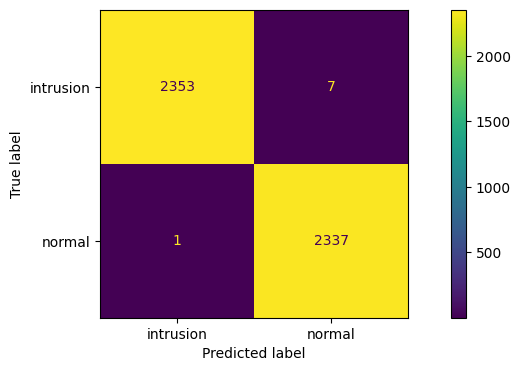

In [25]:
#for xgb model
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix((y_test), xgb_model.predict(X_test)),display_labels = ["intrusion", "normal"]).plot()
plt.savefig('f2.png')

In [26]:
print(classification_report(le.inverse_transform(y_test), le.inverse_transform(xgb_model.predict(X_test))))

              precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00      2360
      normal       1.00      1.00      1.00      2338

    accuracy                           1.00      4698
   macro avg       1.00      1.00      1.00      4698
weighted avg       1.00      1.00      1.00      4698



Epoch 1/20
588/588 [==============================] - 3s 4ms/step - loss: 0.2110 - accuracy: 0.9279 - val_loss: 0.0670 - val_accuracy: 0.9751
Epoch 2/20
588/588 [==============================] - 2s 4ms/step - loss: 0.1033 - accuracy: 0.9665 - val_loss: 0.0530 - val_accuracy: 0.9783
Epoch 3/20
588/588 [==============================] - 2s 3ms/step - loss: 0.0774 - accuracy: 0.9726 - val_loss: 0.0453 - val_accuracy: 0.9802
Epoch 4/20
588/588 [==============================] - 1s 2ms/step - loss: 0.0633 - accuracy: 0.9794 - val_loss: 0.0414 - val_accuracy: 0.9879
Epoch 5/20
588/588 [==============================] - 1s 3ms/step - loss: 0.0610 - accuracy: 0.9805 - val_loss: 0.0400 - val_accuracy: 0.9877
Epoch 6/20
588/588 [==============================] - 1s 2ms/step - loss: 0.0500 - accuracy: 0.9847 - val_loss: 0.0388 - val_accuracy: 0.9885
Epoch 7/20
588/588 [==============================] - 1s 2ms/step - loss: 0.0457 - accuracy: 0.9862 - val_loss: 0.0374 - val_accuracy: 0.9894
Epoch 

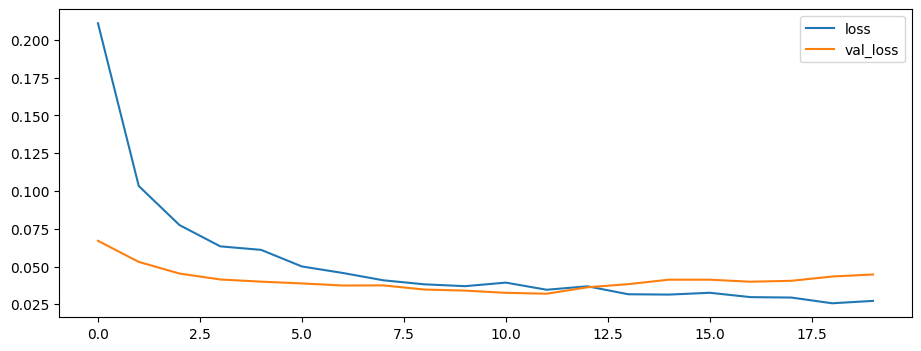

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

model = Sequential()

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=["accuracy"])

model.fit(x=X_train,y=y_train,epochs=20,validation_data=(X_test,y_test),verbose=1)

losses = pd.DataFrame(model.history.history)

losses[['loss','val_loss']].plot()
plt.savefig('loss.png')

147/147 [==============================] - 0s 1ms/step


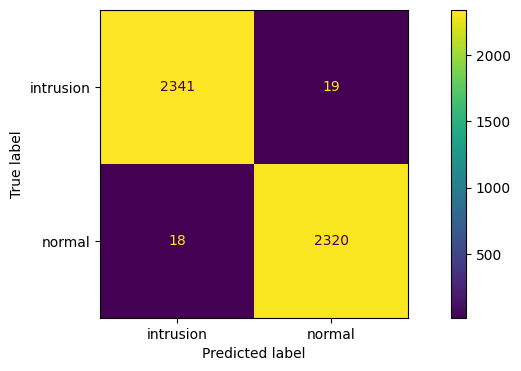

In [28]:
#for the deep neural network
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix((y_test), model.predict(X_test)>0.5),display_labels = ["intrusion", "normal"]).plot()
plt.savefig('f3.png')

In [29]:
print(classification_report(le.inverse_transform(y_test), le.inverse_transform(np.multiply(model.predict(X_test)>0.5,1))))

147/147 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

     anomaly       0.99      0.99      0.99      2360
      normal       0.99      0.99      0.99      2338

    accuracy                           0.99      4698
   macro avg       0.99      0.99      0.99      4698
weighted avg       0.99      0.99      0.99      4698



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
!pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
#https://www.kaggle.com/code/sz8416/simple-bayesian-optimization-for-lightgbm
#we used auc as a metric for optimization
#auc msh y3ni accuracy y3ni area under the curve oktob 3anha

import lightgbm as lgb
from bayes_opt import BayesianOptimization

def bayes_parameter_opt_lgb(X, y, init_round=15, opt_round=25, n_folds=5, random_seed=6, n_estimators=10000, learning_rate=0.05, output_process=False):
    # prepare data
    train_data = lgb.Dataset(data=X, label=y, free_raw_data=False,params={'verbose': -1})
    # parameters
    def lgb_eval(num_leaves, feature_fraction, bagging_fraction, max_depth, lambda_l1, lambda_l2, min_split_gain, min_child_weight):
        params = {'application':'binary','num_estimators': n_estimators, 'learning_rate':learning_rate, 'early_stopping_round':100, 'metric':'auc'}
        params["num_leaves"] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['lambda_l1'] = max(lambda_l1, 0)
        params['lambda_l2'] = max(lambda_l2, 0)
        params['min_split_gain'] = min_split_gain
        params['min_child_weight'] = min_child_weight
        params['verbose']=-1
        cv_result = lgb.cv(params,train_data, nfold=n_folds, seed=random_seed, stratified=True, metrics=['auc'])
        return max(cv_result['auc-mean'])
    # range 
    lgbBO = BayesianOptimization(lgb_eval, {'num_leaves': (24, 45),
                                            'feature_fraction': (0.1, 0.9),
                                            'bagging_fraction': (0.8, 1),
                                            'max_depth': (5, 8.99),
                                            'lambda_l1': (0, 5),
                                            'lambda_l2': (0, 3),
                                            'min_split_gain': (0.001, 0.1),
                                            'min_child_weight': (5, 50)}, random_state=0)
    # optimize
    lgbBO.maximize(init_points=init_round, n_iter=opt_round)
    
    # output optimization process
    if output_process==True: lgbBO.points_to_csv("bayes_opt_result.csv")
    
    # return best parameters
    return lgbBO.max['params']

opt_params = bayes_parameter_opt_lgb(X, y, init_round=10, opt_round=30, n_folds=5, random_seed=6, n_estimators=1000, learning_rate=0.05)

|   iter    |  target   | baggin... | featur... | lambda_l1 | lambda_l2 | max_depth | min_ch... | min_sp... | num_le... |
-------------------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] Unknown parameter: num_estimators
| 1         | 0.9996    | 0.9098    | 0.6722    | 3.014     | 1.635     | 6.69      | 34.07     | 0.04432   | 42.73     |
| 2         | 0.9995    | 0.9927    | 0.4068    | 3.959     | 1.587     | 7.266     | 46.65     | 0.008033  | 25.83     |
| 3         | 0.9995    | 0.804     | 0.7661    | 3.891     | 2.61      | 8.905     | 40.96     | 0.04669   | 40.39     |
| 4         | 0.9997    | 0.8237    | 0.6119    | 0.7168    | 2.834     | 7.082     | 23.66     | 0.02719   | 40.26     |
| 5         | 0.9996    | 0.8912    | 0.5547    | 0.09395   | 1.853     | 7.442     | 32.76     | 0.09443   | 38.32     |
| 6         | 0.9996    | 0.8719    | 0.4496    | 3.488     | 0.1807    | 7.66      | 35.18

In [32]:
#the accuracy kind of stayed the same but this model is more robust since its optimized with cross validation
opt_params["num_leaves"]=round(opt_params["num_leaves"])
opt_params["max_depth"]=round(opt_params["max_depth"])

lgb_model = LGBMClassifier(**opt_params)
lgb_model.fit(X_train, y_train)

lgb_train, lgb_test = lgb_model.score(X_train , y_train), lgb_model.score(X_test , y_test)

print(f"Training Score: {lgb_train}")
print(f"Test Score: {lgb_test}")

Training Score: 0.9982967851820311
Test Score: 0.9963814389101745


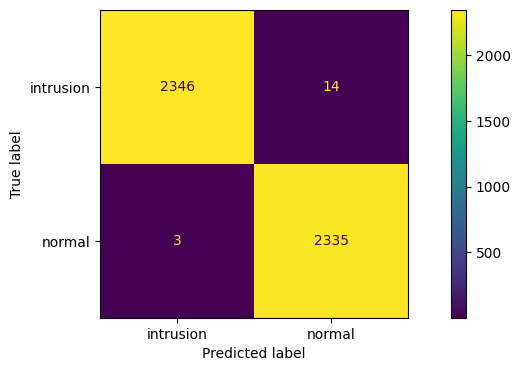

In [33]:
#lgbm confusion matrix after optimization
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix((y_test), lgb_model.predict(X_test)),display_labels = ["intrusion", "normal"]).plot()
plt.savefig('f4.png')

In [34]:
print(classification_report(le.inverse_transform(y_test), le.inverse_transform(lgb_model.predict(X_test))))

              precision    recall  f1-score   support

     anomaly       1.00      0.99      1.00      2360
      normal       0.99      1.00      1.00      2338

    accuracy                           1.00      4698
   macro avg       1.00      1.00      1.00      4698
weighted avg       1.00      1.00      1.00      4698

